## Cluster Analysis 

### Create new dataset with relevant features: 
- no. of problems attempted
- Average time taken for each problem 
- average accuracy 
- Number of times a user upgrades
- Number of time a user downgrades
- Average time between each exercise 
- no. of hints used per qns attempted
- points
- user grade
- teacher count
- student count 
- class count 
- belongs to count 
- badges count 

In [1]:
# Import libraries 
import pandas as pd 
import numpy as np 
import re  
import seaborn as sns 
import matplotlib.pyplot as plt
import os

In [2]:
# %% load data
data_dir = r'C:\Users\Timothy Lim\Desktop\junyi\archive'
info_content = pd.read_csv(os.path.join(data_dir, 'Info_Content.csv'))
info_userdata = pd.read_csv(os.path.join(data_dir, 'Info_UserData.csv'))
log_problem = pd.read_csv(os.path.join(data_dir, 'Log_Problem.csv'))

In [3]:
log_problem

,timestamp_TW,uuid,ucid,upid,problem_number,exercise_problem_repeat_session,is_correct,total_sec_taken,total_attempt_cnt,used_hint_cnt,is_hint_used,is_downgrade,is_upgrade,level
0,2019-05-26 21:00:00 UTC,FLy+lviglNR5Y1l0Xiijnl6QHySBcpKHJLCtQ6ogm2Q=,KDOmuTrY/IJzDP4kIgIYCBiGyTymsJ8Iy4cDB35WGYg=,Vbs92l4JmdiWkUEm/iahxnUTaac2oN1IlUtXB7JcfoE=,18,2,True,33,1,0,False,False,True,3
1,2019-05-17 16:30:00 UTC,+Gqj2nalc6M9fusyVECTC0AN7UQdDQTXESIuElkDltU=,COZ39Wo+uIUO2s7c2VGEHjJf6Vx0xifxVAiaeHtaTdk=,Ek+pIeHNNoEo0tGEq91eBcBmGgy3+A5RWhpj95zTyHM=,4,1,True,8,1,0,False,NaN,NaN,0
2,2019-05-15 19:15:00 UTC,6D5QN8j8ng/VR74ES3A0zqAj0bIFFyaKjKEj8ZyXjQ8=,TwyqyV1uJYlDAX8wX/PtTCVZEBo/APIVfTzzleGkNCQ=,1MBa2f5Qog4JBoAuUfJf0fxeJctdEirAqKgfsg246eI=,9,1,True,17,1,0,False,NaN,NaN,0
3,2019-05-05 14:45:00 UTC,GgTZuCqZXObthtK6GAwqvlHrTMm5pKHWeezQxL/pcKc=,tBo6ECyT8IlKAM8UhQHWkqv92PRLcSiwuerfC7vNX+w=,kdMy2nG+QVMjPkuaMEWs0yV/sYZVoG1vm7zM0fCy+qk=,2,1,True,10,1,0,False,NaN,NaN,0
4,2019-05-14 16:45:00 UTC,JMNKWoU0CkMSzgQ8bCnmCYlD8jEzAVge3lHMYLXKM2g=,vVpSKAMQbTMvtdERR0ksOeRmmaFt0R210t4Z//0RpPA=,jjPR8fmkLSFoCQQYB4g6kI8mgdcK3sKtMirKUvfmZIk=,6,1,True,98,1,0,False,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16217306,2019-04-28 18:30:00 UTC,OhWXH8C9z/xwoVDoZ8E5HlQcZKQT90HeNxiMoBb8zu4=,dp0m1kS6Bygoksx9S/gkBqTcWPoglbf1HT3Ma3U3N8U=,HROyctImDBKuPzjUmVSIohpPweqOuiui22XdmzgKM8I=,7,1,True,11,1,0,False,False,True,2
16217307,2019-04-25 19:15:00 UTC,EuYrT0f2bBxb1mZgHVsuxgwx3v1M5ObPf6Hxx5JGoYE=,WIVV2NtKYatcEnMpVQbIYkGSMd8Q9Xt74y5a+V5bXs0=,KbXWuEmsRHIjtQ0iVYmnpnPoDPzKMSRYo7QiezC664s=,24,2,True,31,1,0,False,False,True,2
16217308,2019-04-25 21:30:00 UTC,CCM2Y18/BIKVuA1YF76my0pEPuniFUQGDaHB/uRnvak=,ZcwX8fZUrnZDOsvBOPux3Oaf1viIG83MNe5frh0jnQw=,tfg/S0CdP/aN7ZW8N1hhSJ1Nq/bOFXdtLGkpQYFMzBg=,10,1,True,32,1,0,False,NaN,NaN,0
16217309,2019-04-12 16:30:00 UTC,kdK8yywPKV0DPbIC7gagzvPyxpC05fA4T9GCBscO2Rk=,HKqPgUALqZGw984KFqAMeDwDJTi9cNhJ51UXfjzELSg=,qAAyk/Jf5/muzMzQ9YaWGQPT10enAZctCKNrm3dQ1IY=,40,3,True,22,1,0,False,NaN,NaN,2


#### Basic Feature Engineering

In [4]:
# no. of unique problems attempted
n_problems_attempted = log_problem[['uuid', 'upid']].groupby(by='uuid')['upid'].nunique()
n_problems_attempted

uuid
++5bdNp/LZvGenJ8Brp4n2SfS9d4pu4qA7cF7FQW7hk=      5
++9EkR6syMGk44XpyhOj40cg9xiXwCLS/TwEy+ujrL0=     21
++E4TrlDYvGtPBg1edhkLXLEEbnfiAgAamPQ33vpW8M=     10
++G4mkLfs4WDYhc1Ga+3G+/oqSniQQvLBm7SBQ3V39Y=     41
++GobOSWqrsaxoRg1bMN+T6biIJcgBXwuOH/ddq3DiU=    153
                                               ... 
zztwLsjf44Uzumou84qh04wObpugkIllLCIp/mgoMu8=     26
zzueVRV14tXIEgW4ixiqmtPNaFYz4MIifbMM/H2tmqA=     27
zzujjvdKzb4wL8cFKdF3Of5gg2XHzIDQCZ2TfaYpSNs=    230
zzvvUOwcSXXTXd8xoyimNcm2DjeVPLmZAI19WKfhSAM=     23
zzyukk9LNl7j/9xxgZj6roQBbGn1MjSPTCgc0r5sXpU=     94
Name: upid, Length: 72758, dtype: int64

In [5]:
# no. of unique exercises attempted
n_ex_attempted = log_problem[['uuid', 'ucid']].groupby(by='uuid')['ucid'].nunique()
n_ex_attempted

uuid
++5bdNp/LZvGenJ8Brp4n2SfS9d4pu4qA7cF7FQW7hk=     1
++9EkR6syMGk44XpyhOj40cg9xiXwCLS/TwEy+ujrL0=     1
++E4TrlDYvGtPBg1edhkLXLEEbnfiAgAamPQ33vpW8M=     1
++G4mkLfs4WDYhc1Ga+3G+/oqSniQQvLBm7SBQ3V39Y=     6
++GobOSWqrsaxoRg1bMN+T6biIJcgBXwuOH/ddq3DiU=    25
                                                ..
zztwLsjf44Uzumou84qh04wObpugkIllLCIp/mgoMu8=     5
zzueVRV14tXIEgW4ixiqmtPNaFYz4MIifbMM/H2tmqA=     4
zzujjvdKzb4wL8cFKdF3Of5gg2XHzIDQCZ2TfaYpSNs=    28
zzvvUOwcSXXTXd8xoyimNcm2DjeVPLmZAI19WKfhSAM=     3
zzyukk9LNl7j/9xxgZj6roQBbGn1MjSPTCgc0r5sXpU=    12
Name: ucid, Length: 72758, dtype: int64

In [6]:
# for each student, what was the avg time they spent per problem? 
avg_time_problem = log_problem.groupby(by='uuid')['total_sec_taken'].mean()
avg_time_problem

uuid
++5bdNp/LZvGenJ8Brp4n2SfS9d4pu4qA7cF7FQW7hk=     60.400000
++9EkR6syMGk44XpyhOj40cg9xiXwCLS/TwEy+ujrL0=     14.758621
++E4TrlDYvGtPBg1edhkLXLEEbnfiAgAamPQ33vpW8M=     89.800000
++G4mkLfs4WDYhc1Ga+3G+/oqSniQQvLBm7SBQ3V39Y=     37.804878
++GobOSWqrsaxoRg1bMN+T6biIJcgBXwuOH/ddq3DiU=     31.890323
                                                   ...    
zztwLsjf44Uzumou84qh04wObpugkIllLCIp/mgoMu8=    130.307692
zzueVRV14tXIEgW4ixiqmtPNaFYz4MIifbMM/H2tmqA=     87.333333
zzujjvdKzb4wL8cFKdF3Of5gg2XHzIDQCZ2TfaYpSNs=     46.907173
zzvvUOwcSXXTXd8xoyimNcm2DjeVPLmZAI19WKfhSAM=     10.217391
zzyukk9LNl7j/9xxgZj6roQBbGn1MjSPTCgc0r5sXpU=     16.436782
Name: total_sec_taken, Length: 72758, dtype: float64

In [7]:
# student accuracy
student_accuracy = log_problem.groupby(by='uuid')['is_correct'].mean()
student_accuracy

uuid
++5bdNp/LZvGenJ8Brp4n2SfS9d4pu4qA7cF7FQW7hk=    1.000000
++9EkR6syMGk44XpyhOj40cg9xiXwCLS/TwEy+ujrL0=    0.103448
++E4TrlDYvGtPBg1edhkLXLEEbnfiAgAamPQ33vpW8M=    0.700000
++G4mkLfs4WDYhc1Ga+3G+/oqSniQQvLBm7SBQ3V39Y=    0.560976
++GobOSWqrsaxoRg1bMN+T6biIJcgBXwuOH/ddq3DiU=    0.883871
                                                  ...   
zztwLsjf44Uzumou84qh04wObpugkIllLCIp/mgoMu8=    0.884615
zzueVRV14tXIEgW4ixiqmtPNaFYz4MIifbMM/H2tmqA=    0.666667
zzujjvdKzb4wL8cFKdF3Of5gg2XHzIDQCZ2TfaYpSNs=    0.552743
zzvvUOwcSXXTXd8xoyimNcm2DjeVPLmZAI19WKfhSAM=    0.956522
zzyukk9LNl7j/9xxgZj6roQBbGn1MjSPTCgc0r5sXpU=    0.741379
Name: is_correct, Length: 72758, dtype: float64

In [8]:
# no. of upgrades and downgrades
n_upgrades = log_problem.groupby(by='uuid')['is_upgrade'].sum()
n_downgrades = log_problem.groupby(by='uuid')['is_downgrade'].sum()

In [9]:
# no. of hints used per qns attempted
n_hints_per_attempted = log_problem.groupby(by='uuid')['is_hint_used'].mean()
n_hints_per_attempted

uuid
++5bdNp/LZvGenJ8Brp4n2SfS9d4pu4qA7cF7FQW7hk=    0.000000
++9EkR6syMGk44XpyhOj40cg9xiXwCLS/TwEy+ujrL0=    0.724138
++E4TrlDYvGtPBg1edhkLXLEEbnfiAgAamPQ33vpW8M=    0.300000
++G4mkLfs4WDYhc1Ga+3G+/oqSniQQvLBm7SBQ3V39Y=    0.439024
++GobOSWqrsaxoRg1bMN+T6biIJcgBXwuOH/ddq3DiU=    0.032258
                                                  ...   
zztwLsjf44Uzumou84qh04wObpugkIllLCIp/mgoMu8=    0.115385
zzueVRV14tXIEgW4ixiqmtPNaFYz4MIifbMM/H2tmqA=    0.259259
zzujjvdKzb4wL8cFKdF3Of5gg2XHzIDQCZ2TfaYpSNs=    0.295359
zzvvUOwcSXXTXd8xoyimNcm2DjeVPLmZAI19WKfhSAM=    0.043478
zzyukk9LNl7j/9xxgZj6roQBbGn1MjSPTCgc0r5sXpU=    0.172414
Name: is_hint_used, Length: 72758, dtype: float64

In [14]:
import datetime as dt
log_problem['timestamp_TW'] = log_problem['timestamp_TW'].apply(lambda x: dt.datetime.strptime(x[:-4], "%Y-%m-%d %H:%M:%S"))
log_problem.sort_values(by='timestamp_TW', ascending=True, inplace=True)
log_problem.head()

,timestamp_TW,uuid,ucid,upid,problem_number,exercise_problem_repeat_session,is_correct,total_sec_taken,total_attempt_cnt,used_hint_cnt,is_hint_used,is_downgrade,is_upgrade,level,ucid_shifted,timestamp_shifted
105021,2018-08-01 07:45:00,U+lqK/FKWkPuoNUM1AbGyrKZfXeQrRRoKOToKrjqDt4=,CPI+5YCeEmhqdk6znJeii6jJUNl1QWGEvwCUJ6uLflg=,9Ksy3bdm0HTi0D+cdKSBKDQJjo5GNahep91FqHUrpts=,2,1,True,8,1,0,False,NaN,NaN,0,NaN,NaN
11669798,2018-08-01 07:45:00,U+lqK/FKWkPuoNUM1AbGyrKZfXeQrRRoKOToKrjqDt4=,CPI+5YCeEmhqdk6znJeii6jJUNl1QWGEvwCUJ6uLflg=,/Wgjdl2BsldHZDdXXvzwGimusaMX548lqV2b7PgwXAs=,1,1,True,10,1,0,False,NaN,NaN,0,CPI+5YCeEmhqdk6znJeii6jJUNl1QWGEvwCUJ6uLflg=,2018-08-01 07:45:00 UTC
3768239,2018-08-01 07:45:00,U+lqK/FKWkPuoNUM1AbGyrKZfXeQrRRoKOToKrjqDt4=,CPI+5YCeEmhqdk6znJeii6jJUNl1QWGEvwCUJ6uLflg=,vsGlLPd9C58B8myBoGMGre2pDHjh62eRjsqX57D98fU=,5,1,True,6,1,0,False,False,True,1,CPI+5YCeEmhqdk6znJeii6jJUNl1QWGEvwCUJ6uLflg=,2018-08-01 07:45:00 UTC
10163558,2018-08-01 07:45:00,U+lqK/FKWkPuoNUM1AbGyrKZfXeQrRRoKOToKrjqDt4=,hv7kHCAIdj7thZUmlqz553leG5bFNYgzXmLfB5m4Xvw=,h3CI/U4QJd6mjYE5xRH8QEst8lRG7otYIz+q1V6Och4=,5,1,True,5,1,0,False,False,True,1,CPI+5YCeEmhqdk6znJeii6jJUNl1QWGEvwCUJ6uLflg=,2018-08-01 07:45:00 UTC
8372688,2018-08-01 07:45:00,U+lqK/FKWkPuoNUM1AbGyrKZfXeQrRRoKOToKrjqDt4=,CPI+5YCeEmhqdk6znJeii6jJUNl1QWGEvwCUJ6uLflg=,OSuDd4rDo2muXXwwJRU2DQVHkk6/JOGgNzfzNi4PMJM=,3,1,True,4,1,0,False,NaN,NaN,0,hv7kHCAIdj7thZUmlqz553leG5bFNYgzXmLfB5m4Xvw=,2018-08-01 07:45:00 UTC


In [15]:
log_problem.tail()

,timestamp_TW,uuid,ucid,upid,problem_number,exercise_problem_repeat_session,is_correct,total_sec_taken,total_attempt_cnt,used_hint_cnt,is_hint_used,is_downgrade,is_upgrade,level,ucid_shifted,timestamp_shifted
3437586,2019-08-01,sGOJQqhUQZ019GmVifddm/O5dw3EMODoBt6vJ4nhbiM=,Jk92rjScG7+mMuAptzCsrhBXKpDuLQA6KI3ojSVY0LA=,A0rsRnzA5x+8ZiLrqlevrEuKB+m9raZ4LcBX4lMAq4o=,4,1,True,22,1,0,False,NaN,NaN,0,0lDY2d/yzs1IgpdsEVNAptv7CcTNSmBXzskCNgPAJTU=,2019-07-31 23:45:00 UTC
14869982,2019-08-01,ZcD/ht0+qTZUSzieuOWi2BJnOcMqH7FS2/eviQlEJVw=,FGPC2guShr0Gk55qXrzvUeeAunh9m5xf7lFMutk2foU=,HQVxssZ/k/UUbQjl2EiArjI8lGUWkZ0UMyK+IKFxxuo=,14,2,False,25,4,3,True,NaN,NaN,0,FGPC2guShr0Gk55qXrzvUeeAunh9m5xf7lFMutk2foU=,2019-08-01 00:00:00 UTC
4965669,2019-08-01,t2N6muKWIarXYsUVv/M4rOx/+Qe0Gy9eC0ufuf7vZ0c=,NPkrCjbLK35wefMCv6y6XMO5eYO/gthS6LGwrdjG2OQ=,FJRsz0wj5uBdWjgCDWJ63y/Ooxbyt9R083/XnSOaQ3g=,8,1,True,22,1,0,False,False,True,2,4iIvLk0lZ+0GBDS1C/Manl0Akf1WtIozwfMOkh1/PFc=,2019-08-01 00:00:00 UTC
6870780,2019-08-01,hCyJTrhgUprNNWpJYKPcyHIxDHnbW91tv0OEM0wXSuI=,pHm5o9NLjlO2lXB7CH2U80qF20rcHwHgxaIwnQiSd/c=,UO2hhxExCcYkKaGHI3B+i0nPkSqnS5z2mo3gvVP2H+c=,1,1,True,18,1,0,False,NaN,NaN,0,Iri0Mm69Jhy9dYumaZScJt7B6cHJhAjve5Ii96kP4vc=,2019-08-01 00:00:00 UTC
15112240,2019-08-01,liamj78o0Ae2wnaS0hq7LUfSTsp3xB6HEcffaKBUzGc=,zcH7Yl/gFwkU2Mej9UzQgaJL66wIdiMucPZwVyeqHxc=,Ms5i+EI/9bpS14wA2YcLHjmfReyVKqfjXuXJe2o9ds8=,1,1,True,31,1,0,False,NaN,NaN,0,lG8uYsrQADh32pvOcrvytT25qo4UpZUGkrybb4ycFEs=,2019-08-01 00:00:00 UTC


In [16]:
# shift cols down by 1
log_problem['ucid_shifted'] = log_problem.groupby(by='uuid', sort=False)['ucid'].shift(1)
log_problem['timestamp_shifted'] = log_problem.groupby(by='uuid', sort=False)['timestamp_TW'].shift(1)
log_problem[log_problem['uuid']==log_problem['uuid'][100]][['timestamp_TW', 'timestamp_shifted', 'ucid', 'ucid_shifted']]

,timestamp_TW,timestamp_shifted,ucid,ucid_shifted
7980549,2019-05-30 16:45:00,NaT,Jl92cIZYcCutl8sqyj2VP8UbUigvqBoHBO/R38DK1DU=,NaN
16105881,2019-05-30 16:45:00,2019-05-30 16:45:00,A2548sl8hqkIMIGY7mlg/p2NN83cncQx2SgT00lyByk=,Jl92cIZYcCutl8sqyj2VP8UbUigvqBoHBO/R38DK1DU=
12728200,2019-05-30 16:45:00,2019-05-30 16:45:00,A2548sl8hqkIMIGY7mlg/p2NN83cncQx2SgT00lyByk=,A2548sl8hqkIMIGY7mlg/p2NN83cncQx2SgT00lyByk=
12909679,2019-05-30 16:45:00,2019-05-30 16:45:00,Jl92cIZYcCutl8sqyj2VP8UbUigvqBoHBO/R38DK1DU=,A2548sl8hqkIMIGY7mlg/p2NN83cncQx2SgT00lyByk=
9423058,2019-05-30 16:45:00,2019-05-30 16:45:00,A2548sl8hqkIMIGY7mlg/p2NN83cncQx2SgT00lyByk=,Jl92cIZYcCutl8sqyj2VP8UbUigvqBoHBO/R38DK1DU=
...,...,...,...,...
12791838,2019-06-05 13:30:00,2019-06-05 13:15:00,xaWHtJt0hf186kbfofLHHt94c0qSZE3L7nvrmIAexws=,z5YJ7GOEyGfxENlfIjBKbMbTzhp3V5TS6Zp62Y/PKPc=
1951229,2019-06-05 13:30:00,2019-06-05 13:30:00,xaWHtJt0hf186kbfofLHHt94c0qSZE3L7nvrmIAexws=,xaWHtJt0hf186kbfofLHHt94c0qSZE3L7nvrmIAexws=
6673029,2019-06-05 13:30:00,2019-06-05 13:30:00,xaWHtJt0hf186kbfofLHHt94c0qSZE3L7nvrmIAexws=,xaWHtJt0hf186kbfofLHHt94c0qSZE3L7nvrmIAexws=
4907715,2019-06-05 13:30:00,2019-06-05 13:30:00,xaWHtJt0hf186kbfofLHHt94c0qSZE3L7nvrmIAexws=,xaWHtJt0hf186kbfofLHHt94c0qSZE3L7nvrmIAexws=


In [17]:
# keep relevant rows
mask = (log_problem['ucid']!=log_problem['ucid_shifted']) & (log_problem['ucid_shifted'].notna())
relevant_logs = log_problem[mask]

# find time diff
relevant_logs['time_diff'] = (relevant_logs['timestamp_TW'] - relevant_logs['timestamp_shifted']).dt.total_seconds()

# get avg time
avg_time = relevant_logs.groupby(by='uuid')['time_diff'].mean()
avg_time

C:\Users\Timothy Lim\Anaconda3\envs\capstone\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


uuid
++G4mkLfs4WDYhc1Ga+3G+/oqSniQQvLBm7SBQ3V39Y=     30985.714286
++GobOSWqrsaxoRg1bMN+T6biIJcgBXwuOH/ddq3DiU=     48624.107143
++KRUQaY4gFsmV7egJVOWqbqbTth/oJBB7yX1HvCSL4=     47581.578947
++LzeMQy/8bNUGD2K5Ms/GdiBlQ16ii82xNw3BYtOZE=     34591.011236
++N4tZH9IkIqtzD06TVvEK4rjiCHFSSqhCtuDhxJvII=      2250.000000
                                                    ...      
zztwLsjf44Uzumou84qh04wObpugkIllLCIp/mgoMu8=      7275.000000
zzueVRV14tXIEgW4ixiqmtPNaFYz4MIifbMM/H2tmqA=       120.000000
zzujjvdKzb4wL8cFKdF3Of5gg2XHzIDQCZ2TfaYpSNs=    192896.703297
zzvvUOwcSXXTXd8xoyimNcm2DjeVPLmZAI19WKfhSAM=       150.000000
zzyukk9LNl7j/9xxgZj6roQBbGn1MjSPTCgc0r5sXpU=    226449.350649
Name: time_diff, Length: 62915, dtype: float64

In [18]:
# check
user = 'zzvvUOwcSXXTXd8xoyimNcm2DjeVPLmZAI19WKfhSAM='
relevant_logs[relevant_logs['uuid']==user][['timestamp_TW', 'timestamp_shifted', 'time_diff']]

,timestamp_TW,timestamp_shifted,time_diff
11938965,2018-10-18 15:15:00,2018-10-18 14:45:00,1800.0
7130891,2018-10-18 15:15:00,2018-10-18 15:15:00,0.0
15470504,2018-10-18 15:15:00,2018-10-18 15:15:00,0.0
12065301,2018-10-18 15:15:00,2018-10-18 15:15:00,0.0
9878275,2018-10-18 15:15:00,2018-10-18 15:15:00,0.0
13894993,2018-10-18 15:15:00,2018-10-18 15:15:00,0.0
662089,2018-10-18 15:15:00,2018-10-18 15:15:00,0.0
5328350,2018-10-18 15:15:00,2018-10-18 15:15:00,0.0
3975278,2018-10-18 15:15:00,2018-10-18 15:15:00,0.0
5507915,2018-10-18 15:15:00,2018-10-18 15:15:00,0.0


In [19]:
# check no negative vals
avg_time.min()

0.0

In [20]:
user = 'zzvvUOwcSXXTXd8xoyimNcm2DjeVPLmZAI19WKfhSAM='
mask = log_problem['uuid']==user
log_problem[mask][['ucid', 'ucid_shifted', 'timestamp_TW', 'timestamp_shifted']]

,ucid,ucid_shifted,timestamp_TW,timestamp_shifted
4959781,CPI+5YCeEmhqdk6znJeii6jJUNl1QWGEvwCUJ6uLflg=,NaN,2018-10-18 14:45:00,NaT
5787556,CPI+5YCeEmhqdk6znJeii6jJUNl1QWGEvwCUJ6uLflg=,CPI+5YCeEmhqdk6znJeii6jJUNl1QWGEvwCUJ6uLflg=,2018-10-18 14:45:00,2018-10-18 14:45:00
11938965,TwyqyV1uJYlDAX8wX/PtTCVZEBo/APIVfTzzleGkNCQ=,CPI+5YCeEmhqdk6znJeii6jJUNl1QWGEvwCUJ6uLflg=,2018-10-18 15:15:00,2018-10-18 14:45:00
2335811,TwyqyV1uJYlDAX8wX/PtTCVZEBo/APIVfTzzleGkNCQ=,TwyqyV1uJYlDAX8wX/PtTCVZEBo/APIVfTzzleGkNCQ=,2018-10-18 15:15:00,2018-10-18 15:15:00
7130891,hv7kHCAIdj7thZUmlqz553leG5bFNYgzXmLfB5m4Xvw=,TwyqyV1uJYlDAX8wX/PtTCVZEBo/APIVfTzzleGkNCQ=,2018-10-18 15:15:00,2018-10-18 15:15:00
5454930,hv7kHCAIdj7thZUmlqz553leG5bFNYgzXmLfB5m4Xvw=,hv7kHCAIdj7thZUmlqz553leG5bFNYgzXmLfB5m4Xvw=,2018-10-18 15:15:00,2018-10-18 15:15:00
8468832,hv7kHCAIdj7thZUmlqz553leG5bFNYgzXmLfB5m4Xvw=,hv7kHCAIdj7thZUmlqz553leG5bFNYgzXmLfB5m4Xvw=,2018-10-18 15:15:00,2018-10-18 15:15:00
15470504,CPI+5YCeEmhqdk6znJeii6jJUNl1QWGEvwCUJ6uLflg=,hv7kHCAIdj7thZUmlqz553leG5bFNYgzXmLfB5m4Xvw=,2018-10-18 15:15:00,2018-10-18 15:15:00
921319,CPI+5YCeEmhqdk6znJeii6jJUNl1QWGEvwCUJ6uLflg=,CPI+5YCeEmhqdk6znJeii6jJUNl1QWGEvwCUJ6uLflg=,2018-10-18 15:15:00,2018-10-18 15:15:00
12065301,hv7kHCAIdj7thZUmlqz553leG5bFNYgzXmLfB5m4Xvw=,CPI+5YCeEmhqdk6znJeii6jJUNl1QWGEvwCUJ6uLflg=,2018-10-18 15:15:00,2018-10-18 15:15:00


In [21]:
# merge everything together
avg_time_problem.name = 'avg_time_per_problem'
student_accuracy.name = 'avg_accuracy'
n_downgrades.name = 'n_downgrades'
n_upgrades.name = 'n_upgrades'
n_hints_per_attempted.name = 'n_hints_per_attempted'
avg_time.name = 'avg_time_btwn_ex'
n_problems_attempted.name = 'n_problems_attempted'
n_ex_attempted.name = 'n_ex_attempted'

clustering_input = pd.concat([n_problems_attempted, n_ex_attempted, avg_time_problem, student_accuracy,
                              n_downgrades, n_upgrades, n_hints_per_attempted, avg_time], axis=1)
clustering_input

,n_problems_attempted,n_ex_attempted,avg_time_per_problem,avg_accuracy,n_downgrades,n_upgrades,n_hints_per_attempted,avg_time_btwn_ex
uuid,,,,,,,,
++5bdNp/LZvGenJ8Brp4n2SfS9d4pu4qA7cF7FQW7hk=,5,1,60.400000,1.000000,0,1,0.000000,NaN
++9EkR6syMGk44XpyhOj40cg9xiXwCLS/TwEy+ujrL0=,21,1,14.758621,0.103448,0,0,0.724138,NaN
++E4TrlDYvGtPBg1edhkLXLEEbnfiAgAamPQ33vpW8M=,10,1,89.800000,0.700000,0,1,0.300000,NaN
++G4mkLfs4WDYhc1Ga+3G+/oqSniQQvLBm7SBQ3V39Y=,41,6,37.804878,0.560976,0,2,0.439024,30985.714286
++GobOSWqrsaxoRg1bMN+T6biIJcgBXwuOH/ddq3DiU=,153,25,31.890323,0.883871,0,19,0.032258,48624.107143
...,...,...,...,...,...,...,...,...
zztwLsjf44Uzumou84qh04wObpugkIllLCIp/mgoMu8=,26,5,130.307692,0.884615,0,4,0.115385,7275.000000
zzueVRV14tXIEgW4ixiqmtPNaFYz4MIifbMM/H2tmqA=,27,4,87.333333,0.666667,0,3,0.259259,120.000000
zzujjvdKzb4wL8cFKdF3Of5gg2XHzIDQCZ2TfaYpSNs=,230,28,46.907173,0.552743,0,17,0.295359,192896.703297


In [22]:
cols_wanted = ['points', 'badges_cnt', 'user_grade', 'has_teacher_cnt', 'has_student_cnt', 'has_class_cnt',
               'belongs_to_class_cnt']

clustering_input = clustering_input.merge(info_userdata[cols_wanted + ['uuid']], left_index=True, right_on='uuid')
clustering_input.set_index('uuid', inplace=True)

In [23]:
clustering_input.isna().sum()

n_problems_attempted        0
n_ex_attempted              0
avg_time_per_problem        0
avg_accuracy                0
n_downgrades                0
n_upgrades                  0
n_hints_per_attempted       0
avg_time_btwn_ex         9843
points                      0
badges_cnt                  0
user_grade                  0
has_teacher_cnt             0
has_student_cnt             0
has_class_cnt               0
belongs_to_class_cnt        0
dtype: int64

In [24]:
clustering_input.fillna(0, inplace=True)

### Clustering
* feature scaling / PCA
    * ideally we want each feature to have a similar scale so that no one feature dominates the clustering algorithm
* K-means clustering
* Interpretation of clustering results

In [25]:
# helper functions
from sklearn.cluster import KMeans

def scale_data(data, scaler):
    scaled_data = pd.DataFrame(scaler.fit_transform(data[data.columns]))
    scaled_data.columns = data.columns
    return scaled_data

def viz_data(data):
    '''
    visualise and check distribution of data
    '''
    
    # infer no. of rows and cols
    nrows = (len(data.columns) // 3) + 1
    ncols = 3
    
    # plot data
    fig, axes = plt.subplots(nrows, ncols, figsize=(22, 20))

    for i, col in enumerate(data.columns):
        target_ax = axes[i // 3, i % 3]
        data[col].plot(kind='hist', ax=target_ax,
                       title=f'distribution of {col}')
    plt.show()

def search_elbow(data, n_clusters=10):
    clusters = []

    for i in range(1, n_clusters + 1):
        km = KMeans(n_clusters=i).fit(data)
        clusters.append(km.inertia_)

    fig, ax = plt.subplots(figsize=(12, 8))
    sns.lineplot(x=list(range(1, 11)), y=clusters, ax=ax)
    ax.set_title('Searching for Elbow')
    ax.set_xlabel('Clusters')
    ax.set_ylabel('Inertia')

    plt.show()

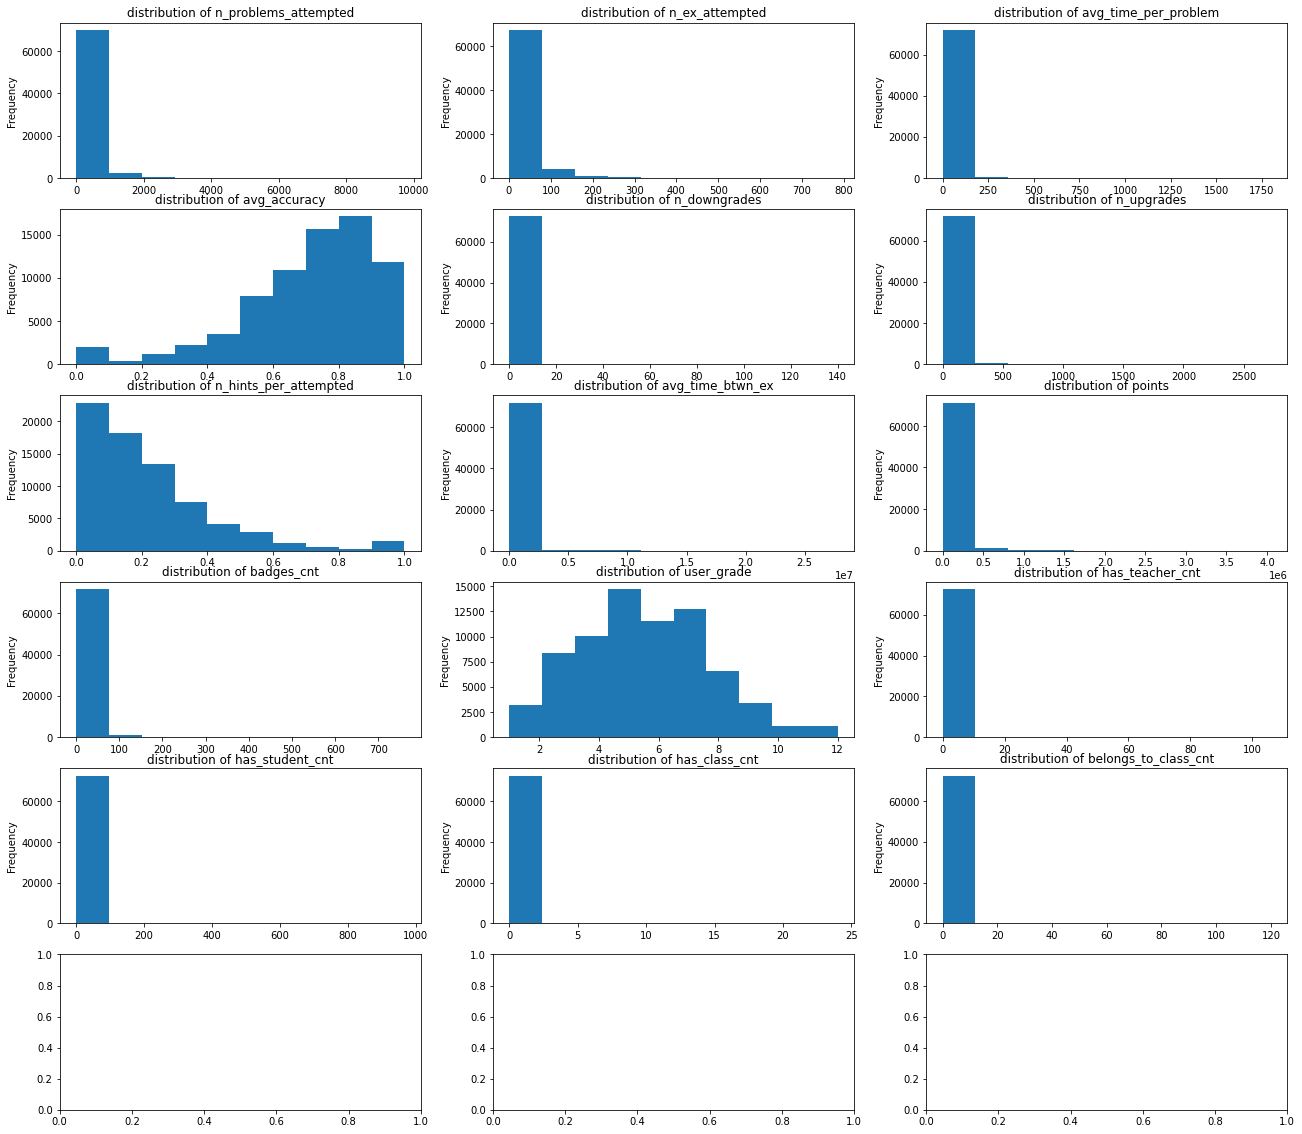

In [26]:
# check distribution of original data
viz_data(clustering_input)

Most of the features are quite skewed. Should look to scale the data

In [27]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

scaler = MinMaxScaler()  # can try using standard scaler also, not sure abt difference
scaled_clustering_input = scale_data(clustering_input, scaler)
scaled_clustering_input

,n_problems_attempted,n_ex_attempted,avg_time_per_problem,avg_accuracy,n_downgrades,n_upgrades,n_hints_per_attempted,avg_time_btwn_ex,points,badges_cnt,user_grade,has_teacher_cnt,has_student_cnt,has_class_cnt,belongs_to_class_cnt
0,0.000412,0.000000,0.033556,1.000000,0.0,0.000367,0.000000,0.000000,0.004132,0.001316,0.545455,0.009434,0.0,0.0,0.008333
1,0.002058,0.000000,0.008199,0.103448,0.0,0.000000,0.724138,0.000000,0.000296,0.003947,0.545455,0.009434,0.0,0.0,0.008333
2,0.000926,0.000000,0.049889,0.700000,0.0,0.000367,0.300000,0.000000,0.002355,0.000000,0.363636,0.009434,0.0,0.0,0.008333
3,0.004115,0.006378,0.021003,0.560976,0.0,0.000734,0.439024,0.001115,0.001983,0.000000,0.454545,0.009434,0.0,0.0,0.008333
4,0.015638,0.030612,0.017717,0.883871,0.0,0.006970,0.032258,0.001750,0.010335,0.002632,0.545455,0.009434,0.0,0.0,0.008333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72753,0.002572,0.005102,0.072393,0.884615,0.0,0.001467,0.115385,0.000262,0.001853,0.000000,0.727273,0.009434,0.0,0.0,0.008333
72754,0.002675,0.003827,0.048519,0.666667,0.0,0.001101,0.259259,0.000004,0.000926,0.000000,0.272727,0.000000,0.0,0.0,0.000000
72755,0.023560,0.034439,0.026060,0.552743,0.0,0.006236,0.295359,0.006941,0.008244,0.005263,0.181818,0.028302,0.0,0.0,0.033333
72756,0.002263,0.002551,0.005676,0.956522,0.0,0.001101,0.043478,0.000005,0.001975,0.001316,0.363636,0.009434,0.0,0.0,0.000000


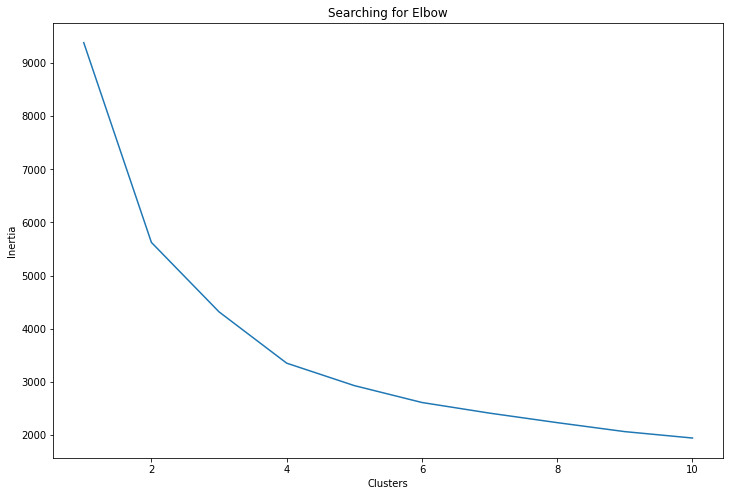

In [28]:
# cluster with avg accuracy
search_elbow(scaled_clustering_input)

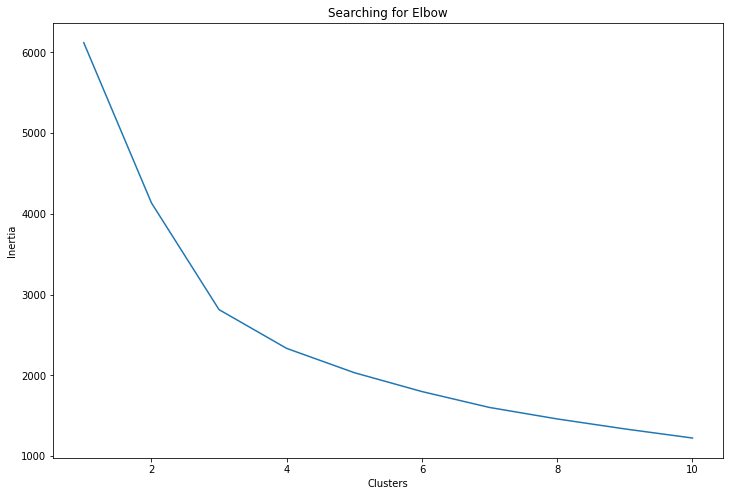

In [29]:
# cluster without avg accuracy
search_elbow(scaled_clustering_input.drop('avg_accuracy', axis=1))

If we include average accuracy, there are possible elbow points at 2 and 4. 
Without including accuracy, seems to only have elbow at 3. 

In [30]:
# fit 4 clusters
km4 = KMeans(n_clusters=4).fit(scaled_clustering_input)

In [31]:
def twoway_plot(x_data, y_data, labels):
    '''
    scatter plot of x and y data
    '''
    n_labels = len(np.unique(labels))
    plt.figure(figsize=(12, 8))
    sns.scatterplot(x_data, y_data, hue=labels, palette=sns.color_palette('hls', n_labels))
    plt.title(f'KMeans with {n_labels} clusters')
    plt.show()

def violin_plot(data, labels):
    '''
    call to get distribution of clusters for each feature
    '''
    # infer no. of rows
    nrows = (len(data.columns) // 3) + 1
    
    data['labels'] = pd.Series(labels, index=data.index)

    fig, axes = plt.subplots(nrows, 3, figsize=(24, 22))

    for i, col in enumerate(data.drop(columns='labels').columns):
        # print(col)
        target_ax = axes[i // 3, i % 3]
        sns.violinplot(x='labels', y=col, data=data, ax=target_ax)
        target_ax.set_title(f'Labels according to {col}')

    plt.show()

C:\Users\Timothy Lim\Anaconda3\envs\capstone\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


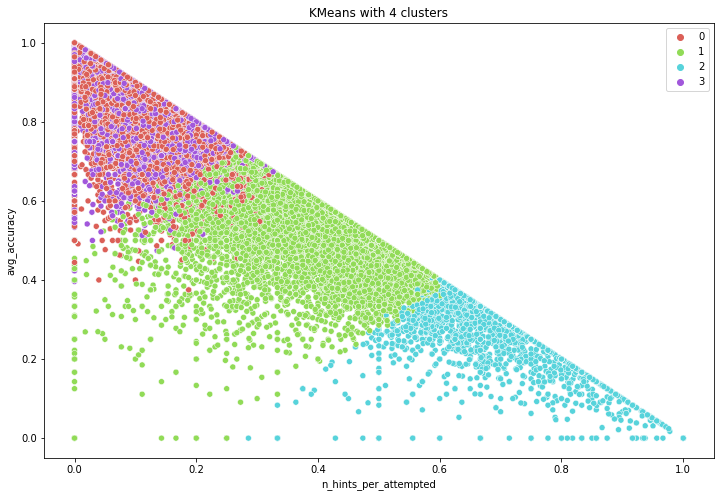

In [32]:
# 4 clusters
twoway_plot(scaled_clustering_input['n_hints_per_attempted'], scaled_clustering_input['avg_accuracy'],
           km4.labels_)


avg_accuracy and n_hints_per_attmpted are strongly correlated with each other. Makes sense since I think students will only be shown hints if they had gotten the question wrong the first time.  

Cluster 1 and 3 are clearly for weaker students, with average accuracies of less than roughly 60%. Cluster 0 and 2 seem to be more mixed.

C:\Users\Timothy Lim\Anaconda3\envs\capstone\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


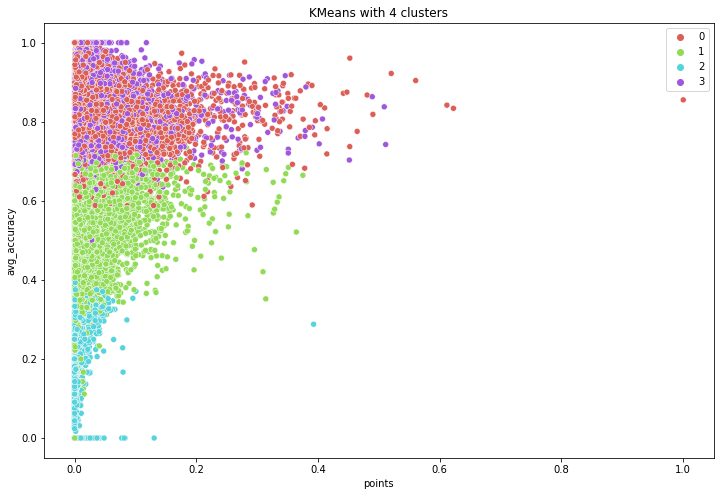

In [33]:
# 4 clusters
twoway_plot(scaled_clustering_input['points'], scaled_clustering_input['avg_accuracy'],
           km4.labels_)


Points was not useful in clustering, but this may have been due to the outliers. We can try using other preprocessing data transformations (eg. Quantile Transformers)

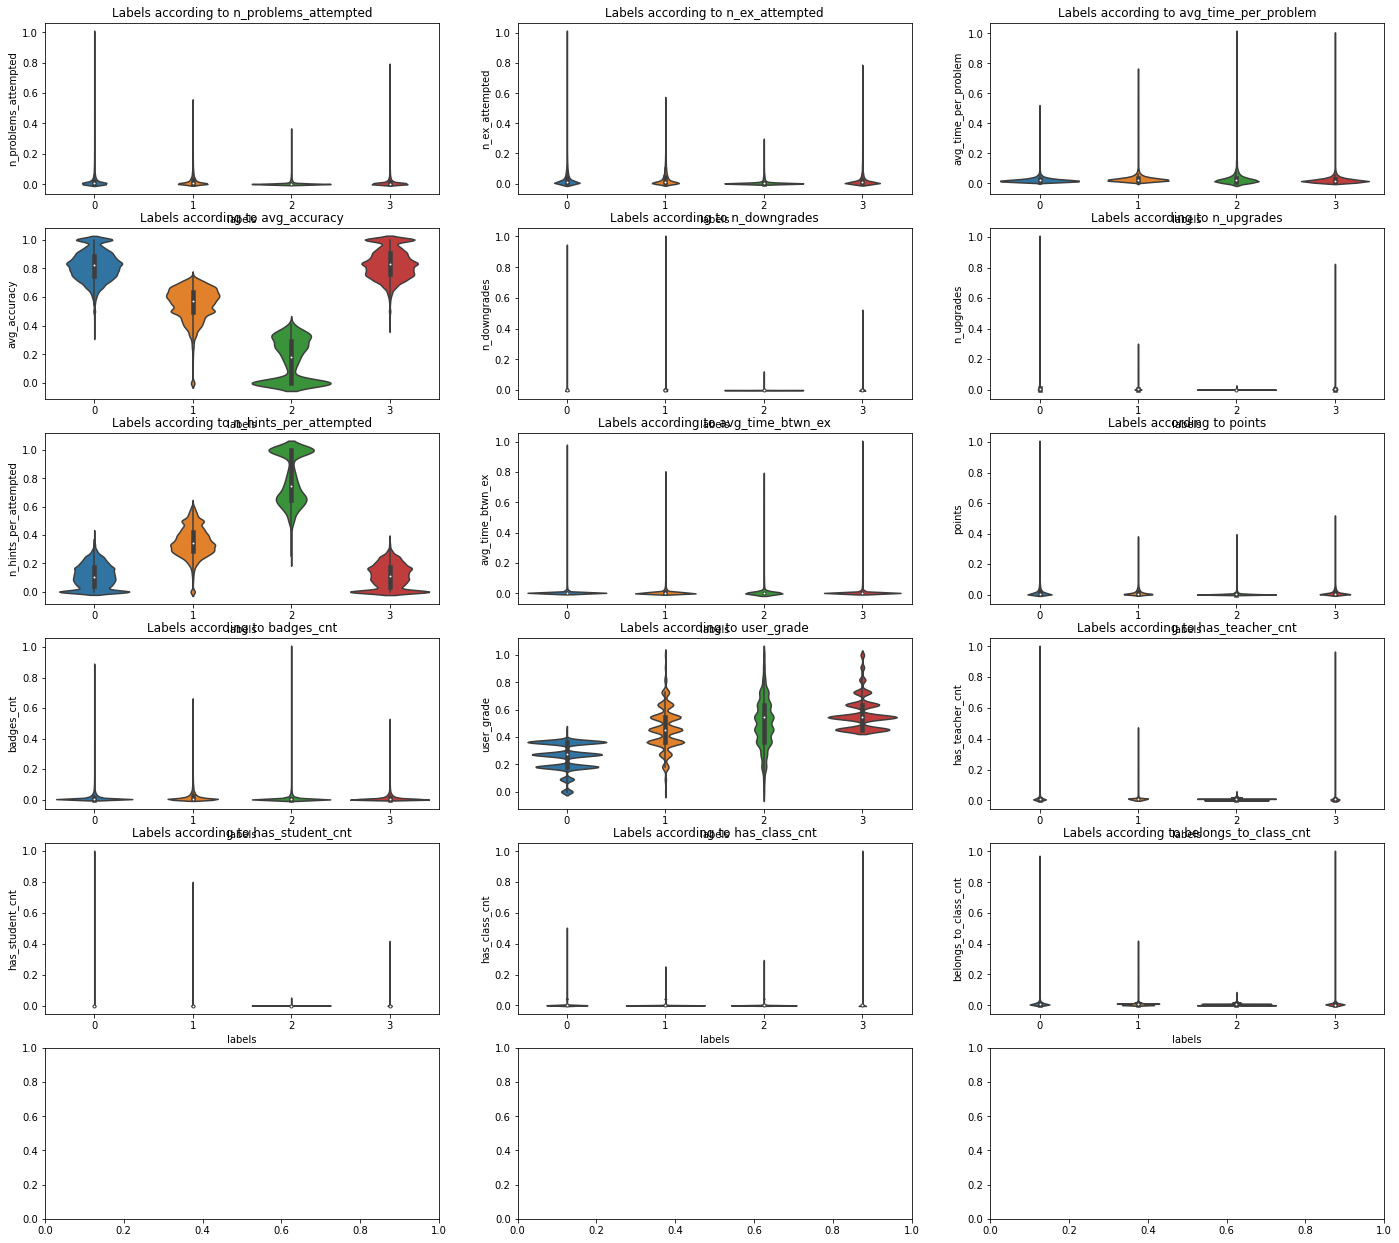

In [34]:
# violin plot
violin_plot(scaled_clustering_input, km4.labels_)

Seems like the clustering is only due to a few features, namely avg_accuracy, n_hints_per_attempted and user_grade

Basically, cluster 0 and 2 are for students with higher avg_accuracy. Clusters 0 and 2 are differentiated by the grade of the students. 

We lose a lot of information for the other clusters due to the presence of outliers, which MinMaxScaler does not handle well. 

sklearn data preprocessing: https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html

In [35]:
from sklearn.preprocessing import QuantileTransformer

n_quantiles = 10  # can play around with this
trf = QuantileTransformer(n_quantiles, random_state=12345)
trf_clustering_input = scale_data(clustering_input, trf)
trf_clustering_input

C:\Users\Timothy Lim\Anaconda3\envs\capstone\lib\site-packages\sklearn\utils\validation.py:72: FutureWarning: Pass n_quantiles=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


,n_problems_attempted,n_ex_attempted,avg_time_per_problem,avg_accuracy,n_downgrades,n_upgrades,n_hints_per_attempted,avg_time_btwn_ex,points,badges_cnt,user_grade,has_teacher_cnt,has_student_cnt,has_class_cnt,belongs_to_class_cnt
0,0.088889,0.000000,0.783925,1.000000,0.0,0.222222,0.000000,0.000000,0.452801,0.333333,0.722222,0.611111,0.0,0.0,0.611111
1,0.292929,0.000000,0.098249,0.024687,0.0,0.000000,0.944828,0.000000,0.052265,0.500000,0.722222,0.611111,0.0,0.0,0.611111
2,0.166667,0.000000,0.889603,0.393241,0.0,0.222222,0.741272,0.000000,0.333008,0.000000,0.388889,0.611111,0.0,0.0,0.611111
3,0.437908,0.444444,0.498587,0.195169,0.0,0.333333,0.883869,0.536249,0.292215,0.000000,0.555556,0.611111,0.0,0.0,0.611111
4,0.700000,0.735043,0.390529,0.807645,0.0,0.755556,0.168459,0.605875,0.655176,0.444444,0.722222,0.611111,0.0,0.0,0.611111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72753,0.339869,0.388889,0.892218,0.808984,0.0,0.481481,0.355687,0.382289,0.277940,0.000000,0.916667,0.611111,0.0,0.0,0.611111
72754,0.346405,0.333333,0.889444,0.333333,0.0,0.444444,0.680482,0.225196,0.157199,0.000000,0.222222,0.000000,0.0,0.0,0.000000
72755,0.781032,0.760684,0.640980,0.187913,0.0,0.733333,0.734346,0.821104,0.600259,0.555556,0.111111,0.889957,0.0,0.0,0.890772
72756,0.313131,0.277778,0.068018,0.931898,0.0,0.444444,0.188406,0.227533,0.291348,0.333333,0.388889,0.611111,0.0,0.0,0.000000


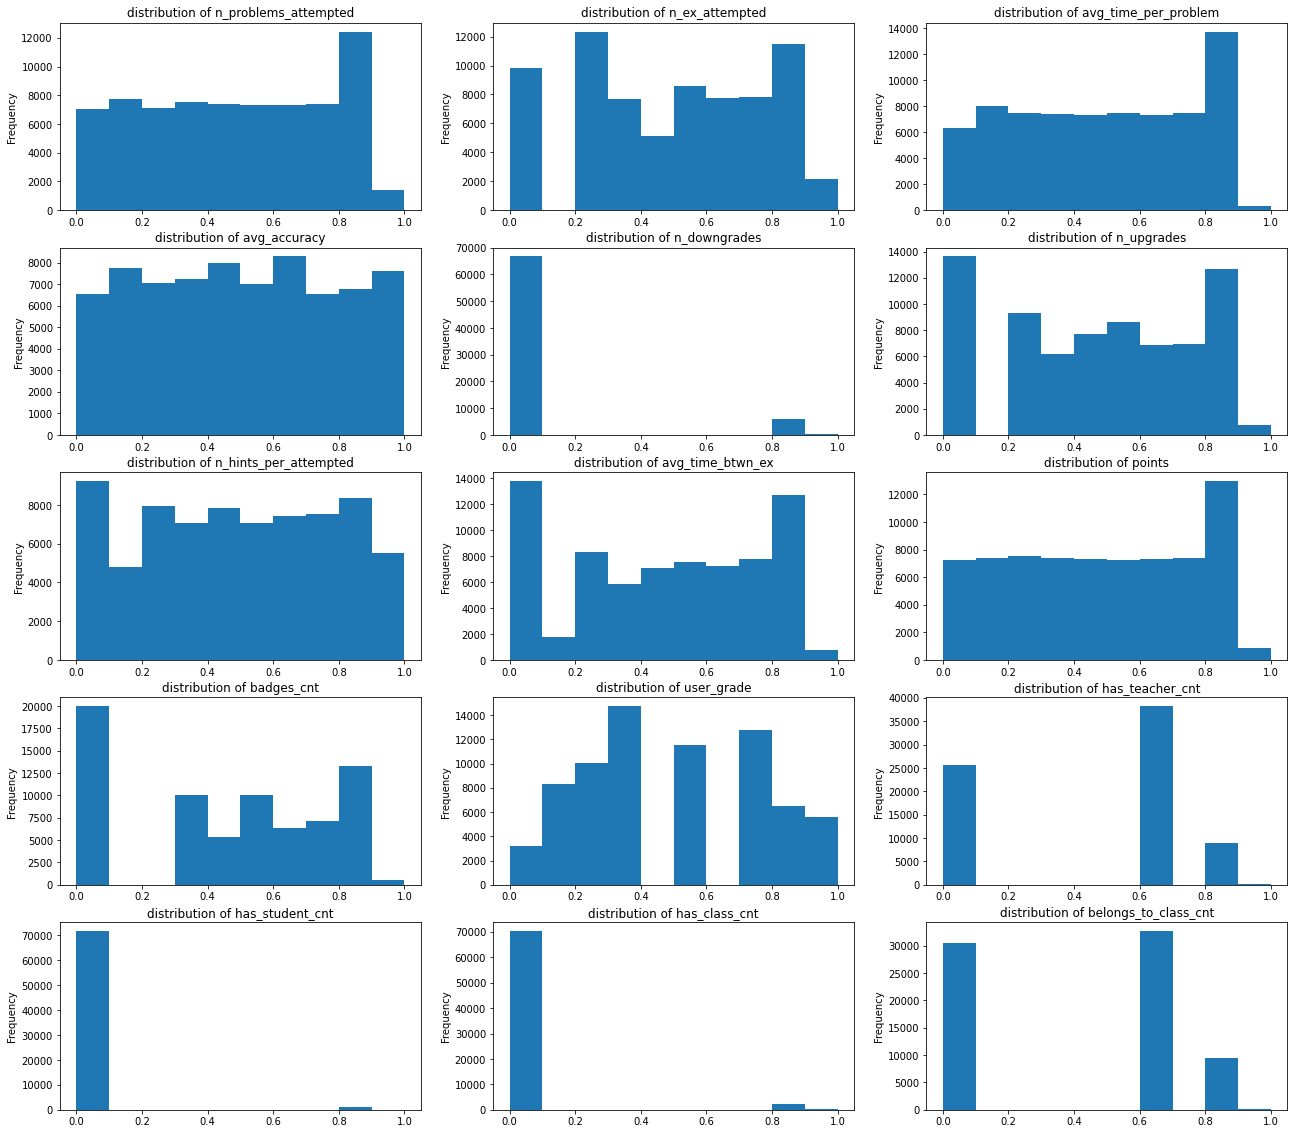

In [36]:
# check distribution
fig, axes = plt.subplots(5, 3, figsize=(22, 20))

for i, col in enumerate(trf_clustering_input.columns):
    target_ax = axes[i // 3, i % 3]
    trf_clustering_input[col].plot(kind='hist', ax=target_ax,
                                  title=f'distribution of {col}')

plt.show()


Looks better? Though might have to remove some features (eg. has_student_cnt)

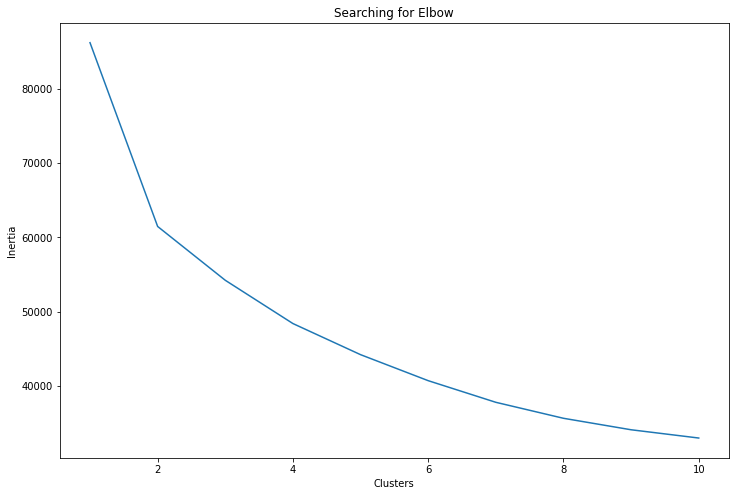

In [37]:
# searching for elbow
search_elbow(trf_clustering_input)

RIP 

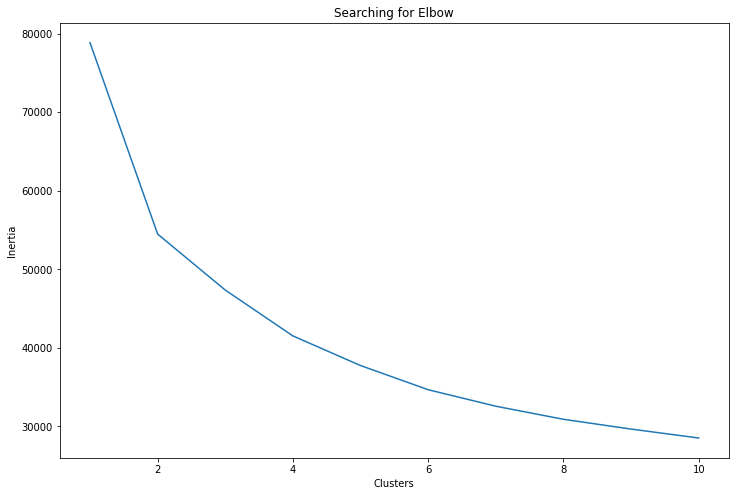

In [38]:
# try dropping some cols
drop_cols = ['n_downgrades', 'has_student_cnt', 'has_class_cnt']
search_elbow(trf_clustering_input.drop(drop_cols, axis=1))

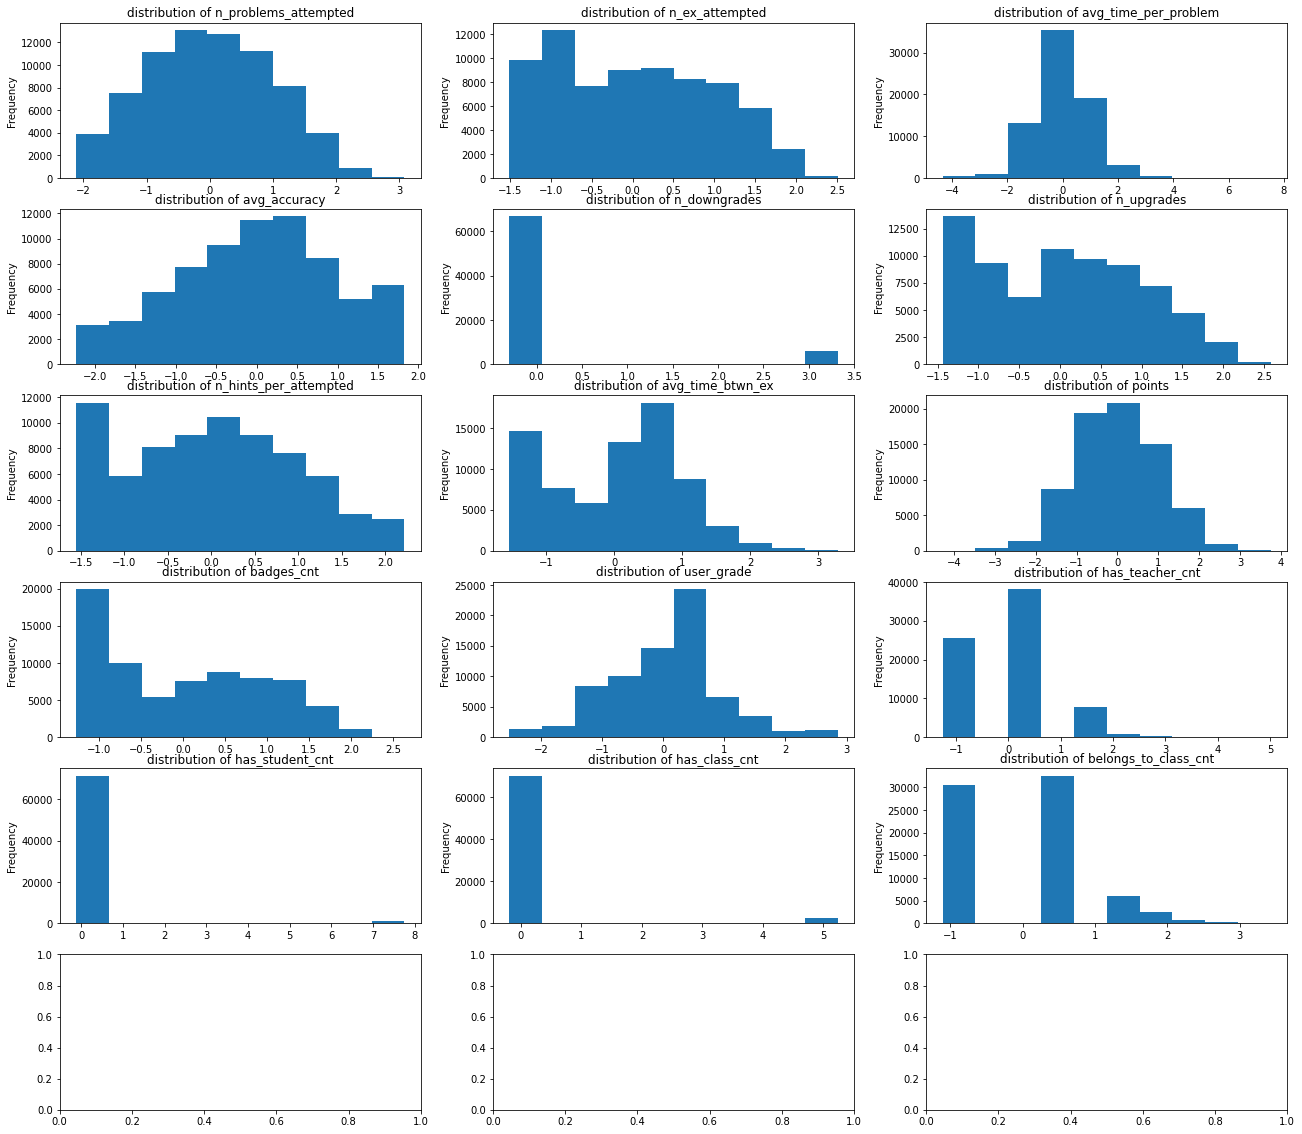

In [39]:
from sklearn.preprocessing import PowerTransformer
# Power transforms are a family of parametric, monotonic transformations that are applied to make data more Gaussian-like. 
pwr = PowerTransformer()
pwr_clustering_input = scale_data(clustering_input, pwr)
viz_data(pwr_clustering_input)


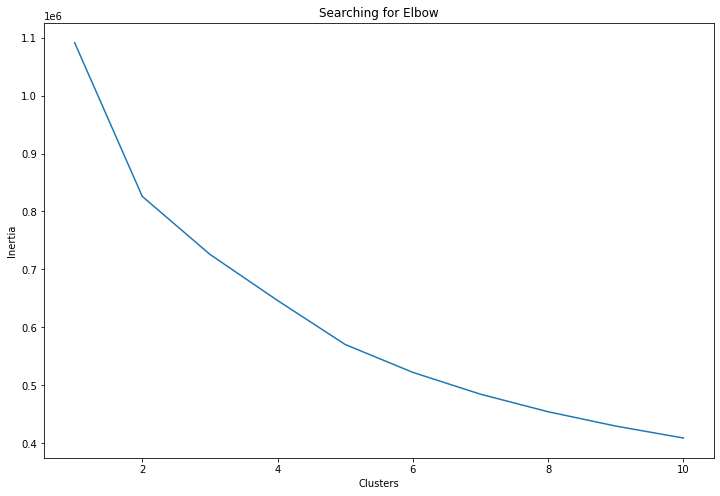

In [40]:
search_elbow(pwr_clustering_input)

In [41]:
log_problem['ucid'].nunique()

1326

In [42]:
# we can try 5 clusters....? but the inertia is not v low

km5 = KMeans(n_clusters=5).fit(pwr_clustering_input)
np.unique(km5.labels_, return_counts=True)

(array([0, 1, 2, 3, 4]),
 array([ 5739, 15554, 29964, 20310,  1191], dtype=int64))

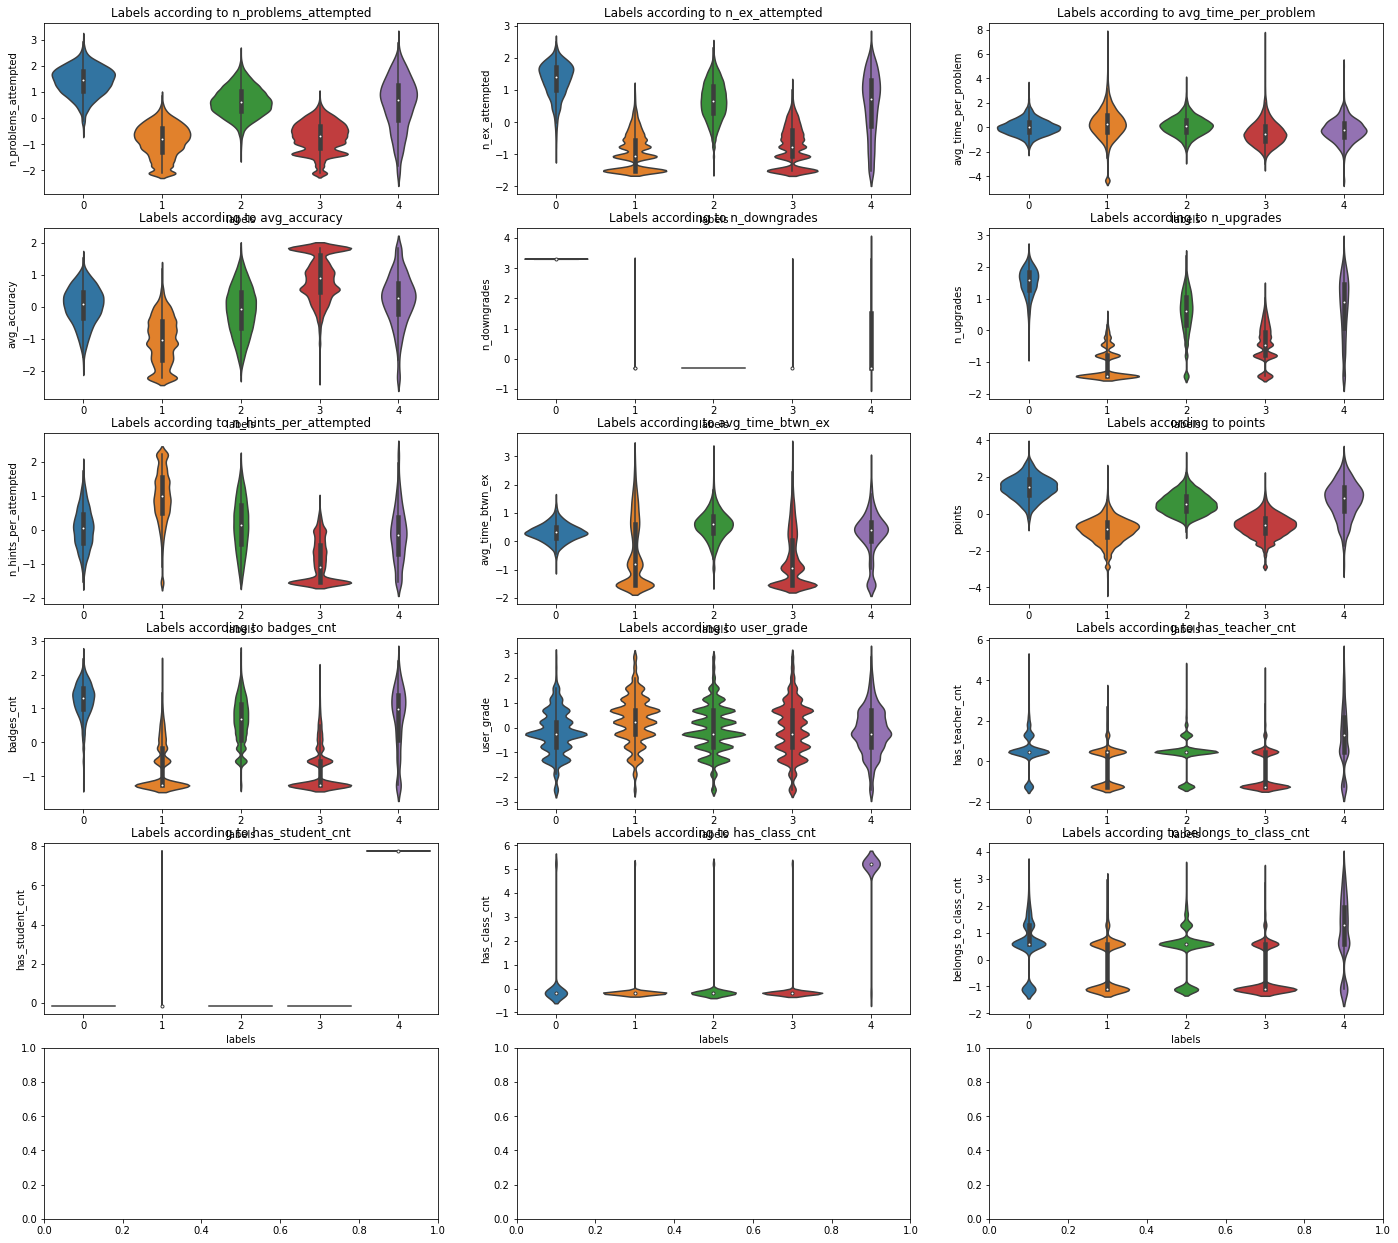

In [43]:
violin_plot(pwr_clustering_input, km5.labels_)

Is this better? Is this worse? At least the clustering is no longer dominated by a few features anymore

Consider removing features which appear to be useless in defining the clusters. (eg. has_student_cnt, n_downgrades)

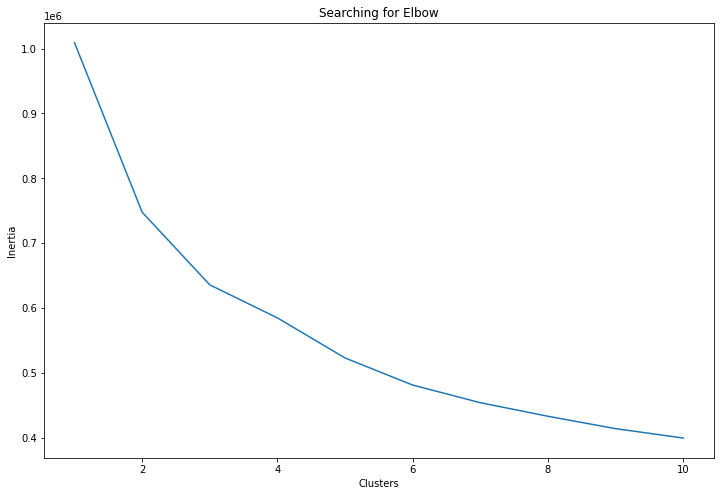

In [44]:
drop_cols = ['has_student_cnt', 'n_downgrades']
search_elbow(pwr_clustering_input.drop(drop_cols, axis=1))

(array([0, 1, 2, 3, 4]), array([16773, 12282, 19114,  2528, 22061], dtype=int64))


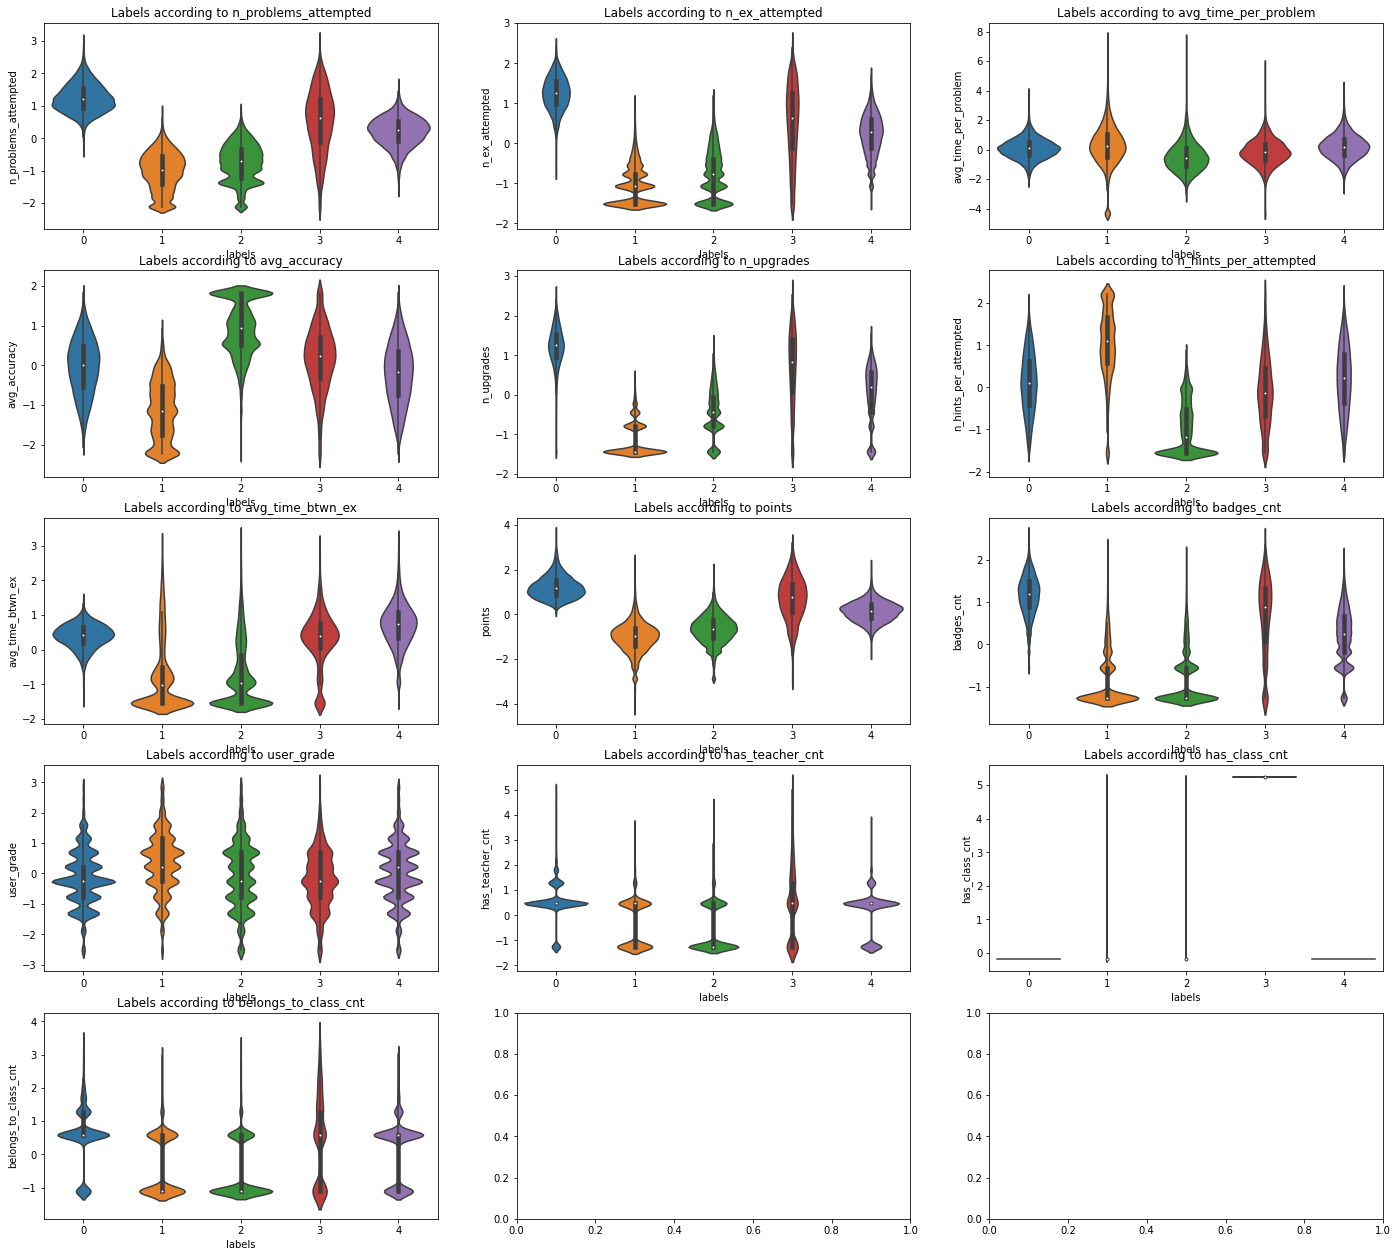

In [45]:
# try 5 clusters
km5_v2 = KMeans(n_clusters=5).fit(pwr_clustering_input.drop(drop_cols, axis=1))
print(np.unique(km5_v2.labels_, return_counts=True))

violin_plot(pwr_clustering_input.drop(drop_cols, axis=1), km5_v2.labels_)

i'm not really sure if this is better or worse haha

In [46]:
# generate learning paths (what was the seq. of exercises each student encountered?)

ex_seq = log_problem.groupby(by=['uuid'], sort=False)['ucid'].apply(lambda x: tuple(x.unique()))
ex_seq

uuid
U+lqK/FKWkPuoNUM1AbGyrKZfXeQrRRoKOToKrjqDt4=    (CPI+5YCeEmhqdk6znJeii6jJUNl1QWGEvwCUJ6uLflg=,...
ZtYcfQTg++4WtnOkIdgI7O4odEyGxOP4ZchUy1ENNIY=    (KpJfQutqPUoUbwWZ5oNFKeVhvKqXZcqL69vsPEHg9jY=,...
Dhn54baDrxJBK7IyBdgtfSRQQCHT3PviTmZmW5/cpOs=    (tOR47i7wGbuHkGxkhX9tHItMHHuJtAttsvHDOjDRVOw=,...
DiFJUUOzzSElF+WB291c9IQobhLVLFWEHzEI3KfKJbk=    (lfFL8LesAlY1wX0+sveN0vu8YZEg5bKCXUOGCLqRxuM=,...
AHtLCC16j7YXj6gCouJXMcLe7UapiMEO1DBn5xUfM6Q=    (4p305X/NqL1Zx9j6BDJEpiQx090kFF3o/LTTGJt5s/E=,...
                                                                      ...                        
saB6CvIM32G0+RDry4wCo5ro6A1kI3fKYaKsjwQc+T4=    (P9MBH2y9lTr+ueuFDr6VDrx3GSS1/MvPLRyklqdSyVM=,...
90OCKSK8bkx4M+KdLllF8XNzykbJldJtxWaxQRuxPWY=    (OnztoLe/KRAGCzT1fhys2SSvoBd4VIDTcFpP5fMpU68=,...
imiCDl6LZJWvpM7rdQkP1wMTYMFxWC9qTFJsIuFaGhg=      (WkiJbEtcQ/6K9mzb+6b/b9MvUag94v5b3NTx6TRIcn8=,)
0Zo0lVHE8Y33fjFhq9XiO/C1ha5rwl9sQ5Hd8h5dEjw=    (vhz7ZImgcFLciakjMFdmn0S/He85wqQkhLiYXRPpu18=,...
PeAJ/aTTLSnfsL0

In [47]:
# check
user = ex_seq.index[0]
result = ex_seq.loc[user]

all(log_problem[log_problem['uuid']==user]['ucid'].drop_duplicates().values == result)

True

In [48]:
pwr_clustering_input.index = clustering_input.index
pwr_clustering_input['ex_seq'] = ex_seq

# check
assert all(pwr_clustering_input.loc[user, 'ex_seq']==log_problem[log_problem['uuid']==user]['ucid'].drop_duplicates().values)

pwr_clustering_input

,n_problems_attempted,n_ex_attempted,avg_time_per_problem,avg_accuracy,n_downgrades,n_upgrades,n_hints_per_attempted,avg_time_btwn_ex,points,badges_cnt,user_grade,has_teacher_cnt,has_student_cnt,has_class_cnt,belongs_to_class_cnt,labels,ex_seq
uuid,,,,,,,,,,,,,,,,,
++5bdNp/LZvGenJ8Brp4n2SfS9d4pu4qA7cF7FQW7hk=,-1.410654,-1.508296,0.697767,1.825396,-0.301452,-0.788386,-1.555771,-1.541022,-0.141822,-0.549657,0.694992,0.470735,-0.129058,-0.191044,0.587290,3,"(VY6aXT7f64ny+uy4pszHVNSy3WHyoFPuhwToxBhB3wM=,)"
++9EkR6syMGk44XpyhOj40cg9xiXwCLS/TwEy+ujrL0=,-0.590123,-1.508296,-1.282285,-2.101984,-0.301452,-1.438151,1.887772,-1.541022,-1.592468,0.068087,0.694992,0.470735,-0.129058,-0.191044,0.587290,1,"(FR4KFXSJBwuu1LqaZRVJs+gv6d7T8mqibchrQhNvAKc=,)"
++E4TrlDYvGtPBg1edhkLXLEEbnfiAgAamPQ33vpW8M=,-1.026137,-1.508296,1.338368,-0.263588,-0.301452,-0.788386,0.726693,-1.541022,-0.471426,-1.269355,-0.263684,0.470735,-0.129058,-0.191044,0.587290,1,"(Qx6mwirYKln7CTvOXad5Do5OkVKmypYSQfFs0MB6Cvs=,)"
++G4mkLfs4WDYhc1Ga+3G+/oqSniQQvLBm7SBQ3V39Y=,-0.186902,-0.242700,-0.011491,-0.916095,-0.301452,-0.447372,1.251383,0.331840,-0.569988,-1.269355,0.224672,0.470735,-0.129058,-0.191044,0.587290,1,"(eJs/Pql/Xui+9mjL0q4CwHI/r+w6Bn3tTCt0i6r4xrg=,..."
++GobOSWqrsaxoRg1bMN+T6biIJcgBXwuOH/ddq3DiU=,0.613114,0.789674,-0.256470,0.892006,-0.301452,0.832111,-1.183977,0.469031,0.420751,-0.176900,0.694992,0.470735,-0.129058,-0.191044,0.587290,2,"(UJx6vGY4lwuup0V3VTTKZmE76AogRe5ecQHc+Yly1YM=,..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zztwLsjf44Uzumou84qh04wObpugkIllLCIp/mgoMu8=,-0.462051,-0.382258,1.974286,0.897453,-0.301452,-0.054681,-0.402798,-0.067684,-0.608626,-1.269355,1.592084,0.470735,-0.129058,-0.191044,0.587290,3,"(E3B9SjT8bMG3v5nbUC0ygPR3x4i/oVjGtA/5V/f05rg=,..."
zzueVRV14tXIEgW4ixiqmtPNaFYz4MIifbMM/H2tmqA=,-0.439343,-0.552831,1.292153,-0.435887,-0.301452,-0.221381,0.529546,-0.916865,-0.993905,-1.269355,-0.773989,-1.254456,-0.129058,-0.191044,-1.108288,1,"(FDFKlshYbN4rO93MtgimwfpEoKerSWp1RFhoSKWXHsY=,..."
zzujjvdKzb4wL8cFKdF3Of5gg2XHzIDQCZ2TfaYpSNs=,0.860017,0.864259,0.308740,-0.949541,-0.301452,0.772868,0.705402,0.931381,0.279113,0.247701,-1.312007,1.805723,-0.129058,-0.191044,1.941137,2,"(Xt9R4E9f2za5+yOINEKCRJbnm/ML+pyrsUJb6rs1XTk=,..."


In [49]:
# no. of unique exercise sequences
ex_seq.nunique()

58215

In [50]:
# most popular courses for each cluster
top_n = 5
count_seq = pwr_clustering_input.groupby(by=['labels', 'ex_seq']).size().reset_index(name='count')
most_pop_by_label = count_seq.sort_values(by=['labels', 'count'], ascending=False).groupby(by='labels').head(top_n)

most_pop_by_label

,labels,ex_seq,count
58729,4,"(+cLbiKkV7+VhNPr7OGG3B3kPpZ8er0mvFvqPbM/gm+E=,)",2
58899,4,"(CPI+5YCeEmhqdk6znJeii6jJUNl1QWGEvwCUJ6uLflg=,)",2
59038,4,"(Iq4bn747ApUwO7SvDR8vvfjBWGvDxAyBTsce0dN3Q1w=,)",2
59079,4,"(JcrFXI7wzq/14kZRPCdix3feq0/yQh1gHU06bGQwNBE=,)",2
59244,4,"(QZ6LopqYP/r9aU9mfJaX3+scQfAlYe19eeaj7TW+zww=,...",2
47853,3,"(CPI+5YCeEmhqdk6znJeii6jJUNl1QWGEvwCUJ6uLflg=,)",320
57432,3,"(tOR47i7wGbuHkGxkhX9tHItMHHuJtAttsvHDOjDRVOw=,)",239
57453,3,"(tOR47i7wGbuHkGxkhX9tHItMHHuJtAttsvHDOjDRVOw=,...",142
58578,3,"(zX5HAUpRYC4F7YPNs5tUeBqVi++rEmPUfsAtHpoZmEQ=,)",122
51081,3,"(PqQyQvOjvvozBCtlR/0pL8uxhe0K63IPiKYCi1tDG1o=,)",118


In [51]:
info_content.shape

(1330, 10)

In [52]:
log_problem['ucid'].nunique()

1326

<AxesSubplot:title={'center':'no. of students in each cluster'}>

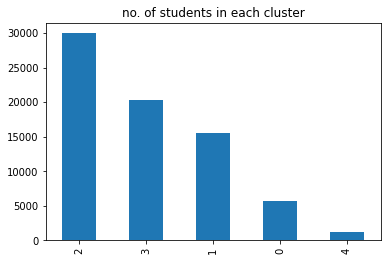

In [53]:
# size of each cluster
pwr_clustering_input['labels'].value_counts().plot(kind='bar', title='no. of students in each cluster')

Results sort of interesting??? A larger proportion of cluster 1 and cluster 4 students take a similar course sequence. There are more students in cluster 2, yet they don't necessarily all take the same sequence of courses.

In earlier analysis, cluster 4 represents students with lower average accuracy while cluster 1 have higher accuracy. 

cluster 2 students have a seemingly mediocre performance in terms of average accuracy.

#### Interpretation of Results with PCA

idea: 
- within each cluster, identify the dimensions which have the most variance 

In [54]:
pwr_clustering_input.columns

Index(['n_problems_attempted', 'n_ex_attempted', 'avg_time_per_problem',
       'avg_accuracy', 'n_downgrades', 'n_upgrades', 'n_hints_per_attempted',
       'avg_time_btwn_ex', 'points', 'badges_cnt', 'user_grade',
       'has_teacher_cnt', 'has_student_cnt', 'has_class_cnt',
       'belongs_to_class_cnt', 'labels', 'ex_seq'],
      dtype='object')

In [80]:
from sklearn.decomposition import PCA

def cluster_pca(labelled_data, cluster, n_components=None, return_pca=False):
    '''
    helper function to perform PCA on selected cluster
    
    idea: within each cluster, decompose the data to identify dimensions in which there is the most variance
    '''
    # select data from cluster
    if cluster:
        cluster_mask = labelled_data['labels']==cluster
        
        
    # if no cluster passed, take all data
    else:
        cluster_mask = [True] * labelled_data.shape[0]
    
    cluster_data = labelled_data[cluster_mask]
    
    if 'labels' in cluster_data.columns:
        cluster_data.drop(columns='labels', axis=1, inplace=True)
    
    if 'ex_seq' in cluster_data.columns:
        cluster_data.drop(columns='ex_seq', axis=1, inplace=True)

    # fit PCA
    pca = PCA(n_components, random_state=12345)
    pca.fit(cluster_data)
    
    # plot results
    fig, ax = plt.subplots(figsize=(14, 8))
    components = pd.DataFrame(pca.components_,
                             columns=cluster_data.columns)
    components.plot(kind='bar', ax=ax)
    ax.set_ylabel('Feature Weights')
    ax.set_xticklabels(components.index)
    plt.axhline(0, linestyle='--', color='black')
    
    for i, ev in enumerate(pca.explained_variance_ratio_): 
        ax.text(i-0.4, ax.get_ylim()[1]+0.05, '%.4f'%(ev))

    plt.legend(title='features', bbox_to_anchor=(1.05, 1))
    plt.tight_layout()
    
    if return_pca:
        return pca

# cluster_pca(pwr_clustering_input, cluster=0, n_components=5)

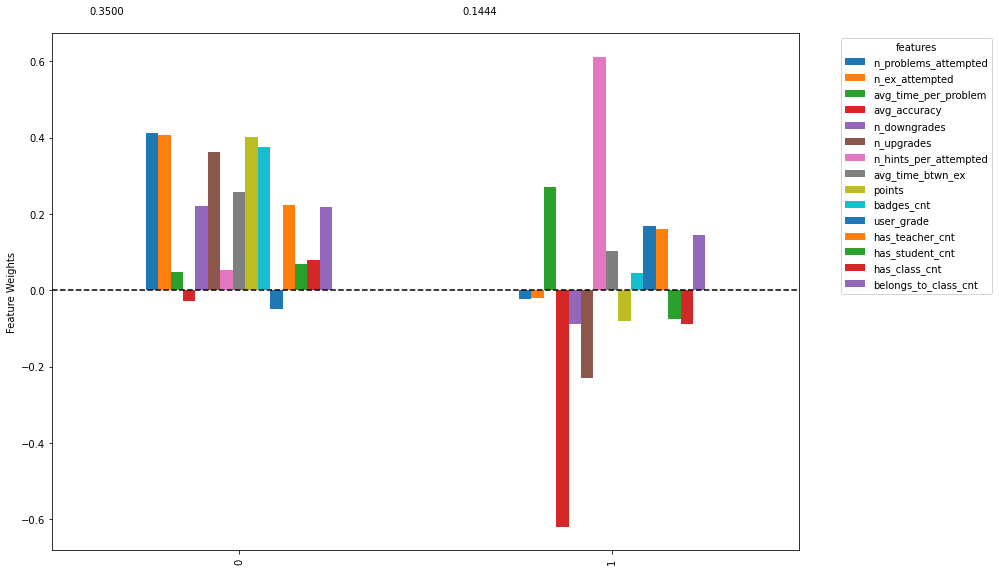

In [76]:
# PCA for all clusters
cluster_pca(pwr_clustering_input, cluster=None, n_components=2)

If we do not specify the cluster to look at, we can search for the features that contribute the most to the first two principal components. This would (roughly) tell us which are the features whereby most of the variance in the data comes from, and hopefully provide us with some clues about where to look for differences between clusters. 

By eyeballing the graph, we can see that *n_problems_attempted, n_ex_attempted* and *points* represent some of the features with a higher variance in the first component. 

In the second component, *avg_accuracy* and *n_hints_per_attempted* have a higher weightage. Interestingly, these features are correlated with each other since users will only see hints if they had answered the question wrongly. 

C:\Users\Timothy Lim\Anaconda3\envs\capstone\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


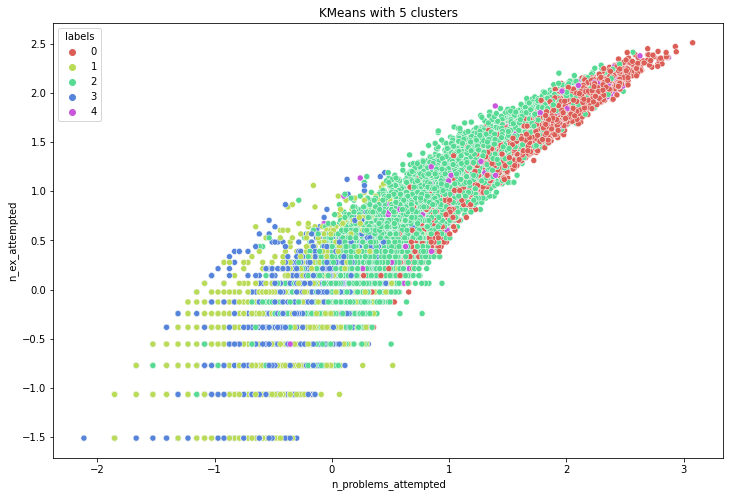

In [77]:
twoway_plot(pwr_clustering_input['n_problems_attempted'], pwr_clustering_input['n_ex_attempted'],
           pwr_clustering_input['labels'])

C:\Users\Timothy Lim\Anaconda3\envs\capstone\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


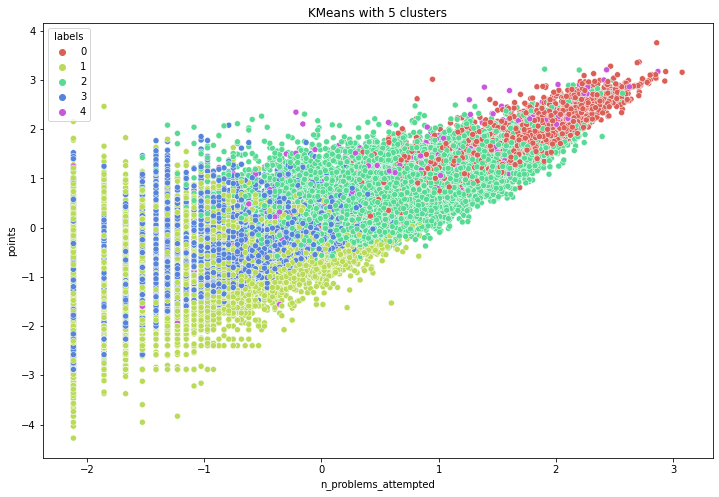

In [78]:
twoway_plot(pwr_clustering_input['n_problems_attempted'], pwr_clustering_input['points'],
           pwr_clustering_input['labels'])

C:\Users\Timothy Lim\Anaconda3\envs\capstone\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


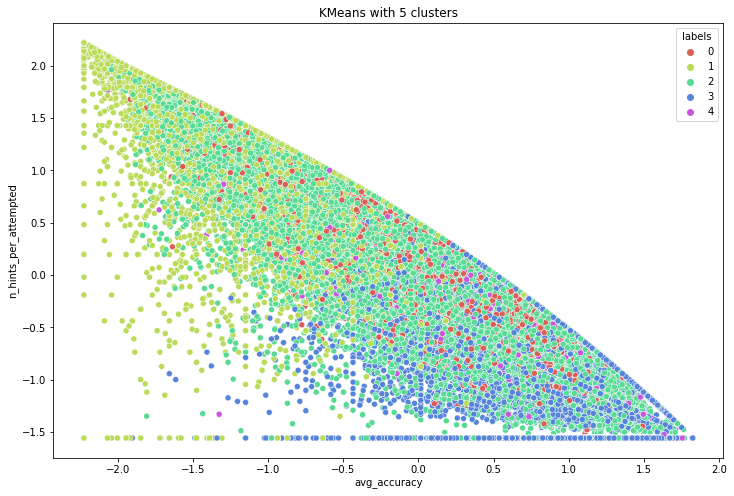

In [79]:
twoway_plot(pwr_clustering_input['avg_accuracy'], pwr_clustering_input['n_hints_per_attempted'],
           pwr_clustering_input['labels'])

C:\Users\Timothy Lim\Anaconda3\envs\capstone\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


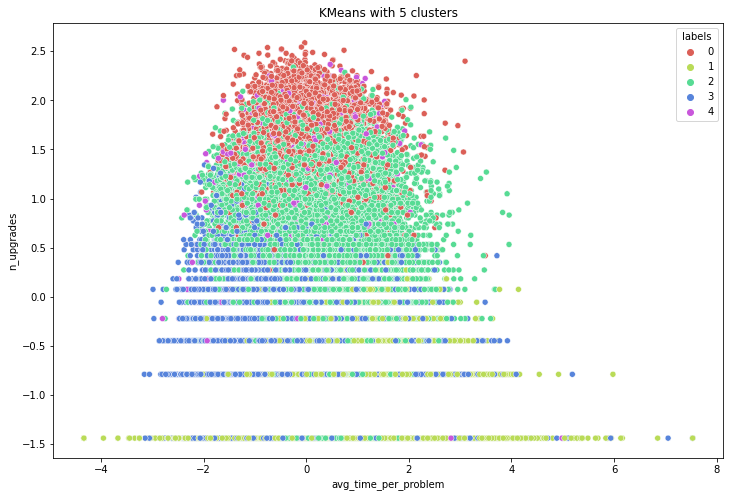

In [81]:
twoway_plot(pwr_clustering_input['avg_time_per_problem'], pwr_clustering_input['n_upgrades'],
           pwr_clustering_input['labels'])

The following hypotheses can be drawn about the student clusters: 

* students from cluster 0 are hardworking (high number of attempted problems, exercises and points), but this does not necessarily translate into good performance (avg_accuracy is spread out, not significantly higher than average) 

* students from cluster 1 are not that active on the platform (low number of attempted problems and exercises, low number of points). This shows in their low average accuracy. 

* students from cluster 2 have similar performance to students from cluster 0 in terms of accuracy. Yet, they appear less active on the platform

* students from cluster 3 have good performance (high avg_accuracy) but below average activity on the platform (low number of attempted problems, exercises and points). These students might have found the exercises too easy and chose not to continue learning on the platform 

* relatively too few students from cluster 4 to compare properly against other clusters

#### Interpreting clusters with decision trees

idea: use the resulting labels as the target variable. Run a decision tree to predict the labels and use the rules extracted to 'define' each cluster. 

In [161]:
original = pd.DataFrame(pwr.inverse_transform(pwr_clustering_input.drop(columns=['labels', 'ex_seq'])))
original.columns = pwr_clustering_input.drop(columns=['labels', 'ex_seq']).columns
original

C:\Users\Timothy Lim\Anaconda3\envs\capstone\lib\site-packages\sklearn\preprocessing\_data.py:3179: RuntimeWarning: divide by zero encountered in power
  x_inv[pos] = np.power(x[pos] * lmbda + 1, 1 / lmbda) - 1


,n_problems_attempted,n_ex_attempted,avg_time_per_problem,avg_accuracy,n_downgrades,n_upgrades,n_hints_per_attempted,avg_time_btwn_ex,points,badges_cnt,user_grade,has_teacher_cnt,has_student_cnt,has_class_cnt,belongs_to_class_cnt
0,5.0,1.0,60.400000,1.000000,0.0,1.0,0.000000,0.000000,16725.0,1.0,7.0,1.0,0.0,0.0,1.0
1,21.0,1.0,14.758621,0.103448,0.0,0.0,0.724138,0.000000,1200.0,3.0,7.0,1.0,0.0,0.0,1.0
2,10.0,1.0,89.800000,0.700000,0.0,1.0,0.300000,0.000000,9533.0,0.0,5.0,1.0,0.0,0.0,1.0
3,41.0,6.0,37.804878,0.560976,0.0,2.0,0.439024,30985.714286,8027.0,0.0,6.0,1.0,0.0,0.0,1.0
4,153.0,25.0,31.890323,0.883871,0.0,19.0,0.032258,48624.107143,41831.0,2.0,7.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72753,26.0,5.0,130.307692,0.884615,0.0,4.0,0.115385,7275.000000,7500.0,0.0,9.0,1.0,0.0,0.0,1.0
72754,27.0,4.0,87.333333,0.666667,0.0,3.0,0.259259,120.000000,3750.0,0.0,4.0,0.0,0.0,0.0,0.0
72755,230.0,28.0,46.907173,0.552743,0.0,17.0,0.295359,192896.703297,33370.0,4.0,3.0,3.0,0.0,0.0,4.0
72756,23.0,3.0,10.217391,0.956522,0.0,3.0,0.043478,150.000000,7995.0,1.0,5.0,1.0,0.0,0.0,0.0


In [179]:
X.min()

n_problems_attempted     1.0
n_hints_per_attempted    0.0
n_downgrades             0.0
avg_accuracy             0.0
has_student_cnt          0.0
dtype: float64

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
72753    0.0
72754    0.0
72755    0.0
72756    0.0
72757    0.0
Name: n_downgrades, Length: 72758, dtype: float64

In [186]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate

dt = DecisionTreeClassifier(max_depth=4, random_state=12345)  # maybe can add more hyperparameters later
# X = pwr_clustering_input.drop(columns=['labels', 'ex_seq'])
X = original[['n_problems_attempted', 'n_downgrades', 'avg_accuracy', 'has_student_cnt']]
X['n_downgrades'] = X['n_downgrades'].replace([np.inf], clustering_input['n_downgrades'].max())
X['has_student_cnt'] = X['has_student_cnt'].replace([np.inf], clustering_input['has_student_cnt'].max())

y = pwr_clustering_input['labels']

# init the cv
cv_results = cross_validate(dt, X, y, cv=5,
                           scoring=('accuracy', 'balanced_accuracy'),
                           return_train_score=True,
                           return_estimator=True)

print(cv_results.keys())

C:\Users\Timothy Lim\Anaconda3\envs\capstone\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Timothy Lim\Anaconda3\envs\capstone\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


dict_keys(['fit_time', 'score_time', 'estimator', 'test_accuracy', 'train_accuracy', 'test_balanced_accuracy', 'train_balanced_accuracy'])


In [187]:
cv_results['test_balanced_accuracy']

array([0.87539663, 0.88479694, 0.874923  , 0.8710288 , 0.87664331])

Results arent that bad..!

In [188]:
# analyse the decision tree estimator

fitted_dt = cv_results['estimator'][0]

# feature importance
for name, importance in sorted(zip(X.columns, fitted_dt.feature_importances_), key=lambda x: x[1]):
    print(f'{name}: {importance}')

has_student_cnt: 0.049904068569259157
n_downgrades: 0.22974532310097398
avg_accuracy: 0.2960012105666245
n_problems_attempted: 0.4243493977631424


In [189]:
import graphviz
import pydot
from sklearn.tree import export_graphviz
from io import StringIO


dot_data = StringIO()
export_graphviz(fitted_dt, feature_names=X.columns,
                class_names=[f'label {c}' for c in y.unique()],
                filled=True, rounded=True,
                special_characters=False,
                out_file=dot_data)

graph = pydot.graph_from_dot_data(dot_data.getvalue())
graph[0].write_pdf('graph.pdf')


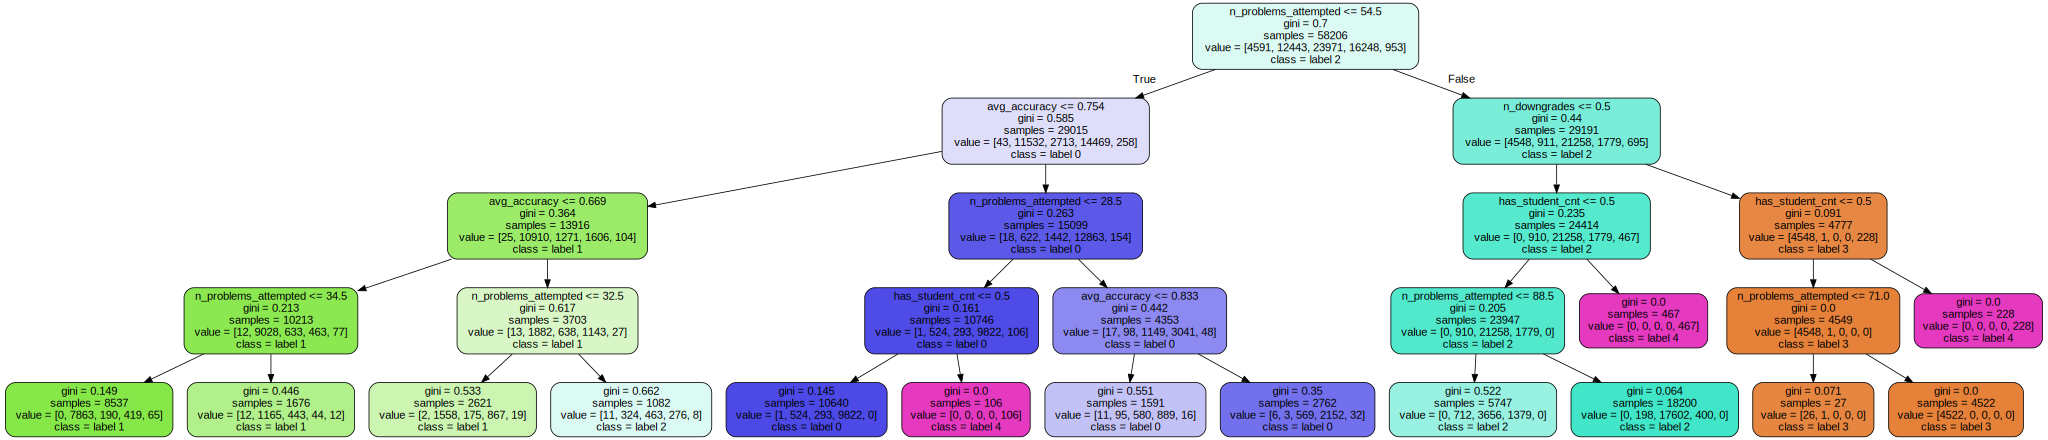

In [190]:
graphviz.Source(graph[0])

#### Embed sequences of exercises

https://www.analyticsvidhya.com/blog/2019/07/how-to-build-recommendation-system-word2vec-python/ 

main idea: 
* algorithm: word2vec takes sentences (sequences of words) as input to form embeddings (vectors) for each word 
* sentences === learning paths 
* words === exercises 

In [56]:
# sequence length for each label

count_seq['ex_seq_len'] = count_seq['ex_seq'].apply(lambda x: len(x))

count_seq[['labels', 'ex_seq_len']].groupby('labels').describe()

ex_seq_len                                                     
            count       mean        std  min   25%   50%    75%    max
labels                                                                
0          5736.0  90.977162  80.205660  2.0  34.0  69.0  124.0  785.0
1         10137.0   4.481602   3.625292  1.0   2.0   3.0    5.0   39.0
2         29743.0  34.017718  35.504890  1.0  12.0  22.0   43.0  603.0
3         13111.0   5.656700   4.056747  1.0   3.0   5.0    7.0   47.0
4          1181.0  46.720576  63.157577  1.0   7.0  24.0   59.0  547.0

In clusters 0 and 4, most students take very few exercises. Maybe we should limit the minimum length of a valid learning path to just 3. 

In [57]:
# most popular paths, given the min length

min_len = 3
valid_mask = count_seq['ex_seq_len'] >= min_len
valid_pop_paths = count_seq[valid_mask].sort_values(by=['labels', 'count'], ascending=False).groupby(by='labels').head(top_n)

valid_pop_paths

,labels,ex_seq,count,ex_seq_len
58728,4,"(+N+e7SzcUVowUo7D4udR8rBKRmR1H7yuu5Tleqlhv48=,...",1,69
58730,4,"(+cLbiKkV7+VhNPr7OGG3B3kPpZ8er0mvFvqPbM/gm+E=,...",1,13
58731,4,"(+zUL0wWCfsBXNoDj5KsvASLlqd26KU9+nSN1zZ7GsQI=,...",1,116
58732,4,"(/4h6DuvZuZzr028oR886m6kpiLYuUSmpr9v3ITNTgiY=,...",1,3
58733,4,"(/4h6DuvZuZzr028oR886m6kpiLYuUSmpr9v3ITNTgiY=,...",1,19
57476,3,"(tOR47i7wGbuHkGxkhX9tHItMHHuJtAttsvHDOjDRVOw=,...",61,3
48192,3,"(CPI+5YCeEmhqdk6znJeii6jJUNl1QWGEvwCUJ6uLflg=,...",51,3
55159,3,"(hv7kHCAIdj7thZUmlqz553leG5bFNYgzXmLfB5m4Xvw=,...",33,3
47612,3,"(BG1RsWojzEHzV28RBm/1iKi1NyZgDcDomLYEJSV6lmo=,...",27,3
49472,3,"(Iq4bn747ApUwO7SvDR8vvfjBWGvDxAyBTsce0dN3Q1w=,...",22,3


Not possible to find learning paths for every cluster. For example, there is no popular path found in cluster 3. Embeddings might potentially help to solve this issue. 

Similar to NLP problems, we use embeddings to get vector representations of each sequence. Each sequence is made up of exercises. The 'vocabulary' will be the number of unique exercises.

In [58]:
# what is the size of the vocabulary?
log_problem['ucid'].nunique()

1326

In [59]:
# create the embedding
from tqdm import tqdm
from gensim.models import Word2Vec

sequence_list = pwr_clustering_input['ex_seq'].values

embedding_model = Word2Vec(window=10,  # what should the context of each course be? how far back / forward to look 
                          sg=1,  # use skip-gram, better for infrquent words
                          hs=0,
                          negative=10,  # no. of 'random' examples to draw to represent wrong contexts
                          alpha=0.03,  # learning rate
                          min_alpha=0.0007,  # learning rate drops to min_alpha as training progresses
                          seed=12345)

embedding_model.build_vocab(sequence_list, progress_per=200)
embedding_model.train(sequence_list, total_examples=embedding_model.corpus_count,
                     epochs=10, report_delay=1)

(16757987, 17300900)

C:\Users\Timothy Lim\Anaconda3\envs\capstone\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


(1326, 100)


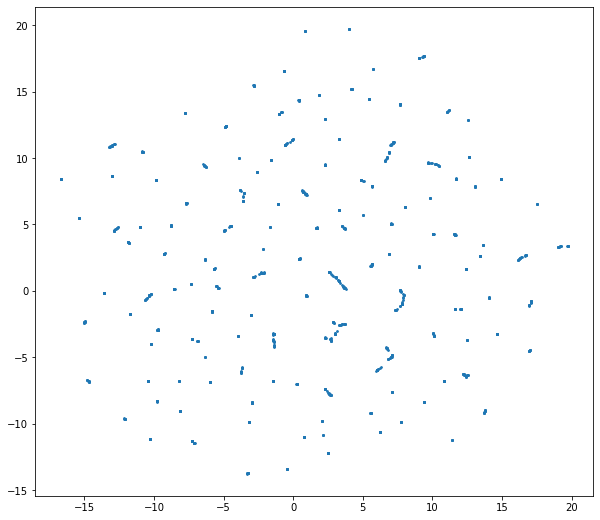

In [60]:
# visualise embedings with UMAP
# https://umap-learn.readthedocs.io/en/latest/how_umap_works.html

import umap.umap_ as umap

X = embedding_model[embedding_model.wv.vocab]
print(X.shape)

cluster_embedding = umap.UMAP(n_neighbors=3, min_dist=0.0,
                              n_components=2, random_state=42).fit_transform(X)

plt.figure(figsize=(10,9))
plt.scatter(cluster_embedding[:, 0], cluster_embedding[:, 1], s=3, cmap='Spectral')

Each point represents a distinct exercise. Mostly spread out, but we can see some exercises that are kind of close to each other. 

Next, we have to define how 'similar' two given sequences are. Currently, we have a vector representation for each exercise. To aggregate it to the sequence level, we can take the average of the vectors. After that, we can use cosine similarity to obtain a measure of similarity between two vectors.

Note that this approach loses some information about the order of the exercises. 

In [61]:
def agg_vectors(sequence):
    '''
    take a given sequence, outputs the mean of the embeddings for each exercise in the sequence
    '''
    # init variables
    exercise_vectors = []
    
    for ex in sequence:
        try:
            exercise_vectors.append(embedding_model[ex])
        except KeyError:
            print(f'no embedding for {ex}')
            continue

    return np.mean(exercise_vectors, axis=0)
    
# test function
test_seq = valid_pop_paths['ex_seq'].values[0]
agg_vectors(test_seq)

C:\Users\Timothy Lim\Anaconda3\envs\capstone\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # Remove the CWD from sys.path while we load stuff.


array([-0.03932357,  0.186432  ,  0.09513998, -0.0626395 ,  0.02549489,
       -0.01234228,  0.38154098,  0.3828613 , -0.32000375,  0.12324831,
        0.6122066 ,  0.14526197,  0.04418886, -0.1039108 ,  0.02414275,
       -0.06719894, -0.43281573, -0.08014526,  0.16801055, -0.2855773 ,
       -0.07789561,  0.6572361 ,  0.10919176, -0.04994085,  0.01010216,
        0.15227912, -0.26240006,  0.17845292, -0.09900017, -0.11036485,
       -0.23963414,  0.16182394,  0.1887004 ,  0.96523714, -0.23658177,
       -0.10654922, -0.03747869, -0.3642767 , -0.04155613, -0.28385547,
       -0.05469817,  0.29934415,  0.08869929,  0.16166614,  0.29391384,
        0.53008795, -0.07949962, -0.37725243,  0.5917998 ,  0.1584384 ,
       -0.64736015, -0.09983598, -0.40803584,  0.00966231,  0.0614191 ,
        0.113075  ,  0.27475223,  0.12365825, -0.19148722, -0.48132434,
       -0.34369636, -0.3049239 , -0.41878155, -0.16272332, -0.11216608,
        0.28161895,  0.34300143,  0.06547327, -0.08679791,  0.06

In [62]:
# generate results for all the sequences
sequences = pwr_clustering_input['ex_seq'].unique()
seq_vectors = {seq: agg_vectors(seq) for seq in sequences}

len(seq_vectors)

C:\Users\Timothy Lim\Anaconda3\envs\capstone\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # Remove the CWD from sys.path while we load stuff.


58215

In [63]:
# create df
seq_vectors_df = pd.DataFrame.from_dict(seq_vectors, orient='index')
seq_vectors_df.shape

(58215, 100)

In [64]:
seq_vectors_df.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
"(VY6aXT7f64ny+uy4pszHVNSy3WHyoFPuhwToxBhB3wM=,)",-0.075493,0.209796,0.272548,-0.393444,0.114865,0.200228,0.572373,0.711324,-0.209553,0.189261,...,0.079888,-0.052462,-0.088469,-0.275110,0.500252,0.185420,-0.065363,-0.130437,-0.052973,0.121664
"(FR4KFXSJBwuu1LqaZRVJs+gv6d7T8mqibchrQhNvAKc=,)",-0.032385,0.602128,0.259406,-0.086941,0.133060,0.229857,0.454958,0.258510,-0.449233,0.842279,...,-0.003751,-0.172937,-0.395889,-0.091644,0.195686,-0.379960,0.146502,-0.203590,-0.234737,-0.422996
"(Qx6mwirYKln7CTvOXad5Do5OkVKmypYSQfFs0MB6Cvs=,)",-0.025686,0.402679,0.017330,-0.089083,-0.060575,-0.349176,-0.279718,0.740127,0.065322,0.105502,...,0.084028,0.083108,-0.435197,0.070572,-0.054127,-0.277647,-0.497215,-0.422956,-0.397535,-0.305378
"(eJs/Pql/Xui+9mjL0q4CwHI/r+w6Bn3tTCt0i6r4xrg=, hxF+GCZ2kFjuoHOUVj0a6Jn9NbRfydExscjLa0cvxuw=, m7rxdmifsJ8HxB91x1USFvW7op/ZusrvlAjq/FAmRE8=, 412PAnenNdYglQWXSlVtS1RYA7Yg60Wty166LCMaiHU=, HKqPgUALqZGw984KFqAMeDwDJTi9cNhJ51UXfjzELSg=, VFSfDdE2vLsyVfGCGYLnxYih+n8+IpUbRoiUpDJ4hc4=)",0.379174,0.227371,-0.377290,-0.056804,0.508614,0.053907,-0.068174,0.180300,-0.352144,0.181111,...,0.280010,-0.073753,0.490684,0.021559,-0.333421,0.227849,-0.179254,-0.318199,-0.099112,-0.045834
"(UJx6vGY4lwuup0V3VTTKZmE76AogRe5ecQHc+Yly1YM=, hv7kHCAIdj7thZUmlqz553leG5bFNYgzXmLfB5m4Xvw=, CPI+5YCeEmhqdk6znJeii6jJUNl1QWGEvwCUJ6uLflg=, TwyqyV1uJYlDAX8wX/PtTCVZEBo/APIVfTzzleGkNCQ=, WIVV2NtKYatcEnMpVQbIYkGSMd8Q9Xt74y5a+V5bXs0=, PqQyQvOjvvozBCtlR/0pL8uxhe0K63IPiKYCi1tDG1o=, T7V7D8OgJF2BeuK/agj56BY9ibTmoqRbGdtwrt8a1SQ=, dp0m1kS6Bygoksx9S/gkBqTcWPoglbf1HT3Ma3U3N8U=, svTmVFY7kPYUWAdDc4l5Zaim90TY7RGkFLs/eaU4FVc=, OVGQBBcCHSOyJ89uwY+z15n2iuZYrv8Tajf37jiGzqc=, w3a6Wk12CqIrUktZei2Z0W3Rf8xdgEdjIW9QX0MWIf8=, jImuGvSym6odgRoYw7vgkq4HUbmJ1tDW9fq6bo/yN5s=, lvobiTtwUsd1ylmrciW7NzJnmmcqFC1J9PmoZ6R8xK0=, +owQ9eTzitOLHF3SZxKwWN9ZpsHjg3tK4A9fpS7E0oo=, ZDQe2EAf9O/FBmCJpXM2GZK7E3bfQfT6M8rHZ21H5Uc=, NX6O5HSHAPuk5+88sOGUAz1W2bEmTv/p2N9DrrWfZiM=, 2rJ6DLjEMKZiRtzTx7yjg+2lbHOfTfLDyNli2mFXTiA=, 4ocFSB0WJ+OdC6URbytP90Mq+4KaJGPg3s0Dq7kysgw=, DNXGwbi0H2VORtI1i1PGiDKE8ZQmugjzZLUNzuWQwE8=, jw8OL6LfnyWsdxIIZhy1YgMUrD3jub8kSMulJZffG6U=, dVKfHzCsi1dOBhd343bsUNF4dowsiANnvRBkWqToitg=, K1JDDj+chCE/ZH5wzdraQHI2j52Nzy0JBJmeLOgq3vc=, voXzLrgpNaTssnERUsWHe8i5qAk+0Mev4EacAigUwIk=, lzijoqcCBafidRGCkuAcau0Fyc+z+574LY9rAn0Qnng=, Za+UP8i5RYOzsfA98cUkUzKWLYcmHOg7TpQTWUNg1is=)",-0.080591,0.310562,0.032957,-0.156568,0.194043,0.046698,0.154432,0.274643,-0.262316,0.399422,...,-0.100028,0.112987,-0.339663,0.139849,-0.057528,-0.128099,-0.046231,-0.276349,-0.230059,-0.162086


yucks...

In [65]:
# takes too long to do elbow plot, lets just fit n_clusters = sqrt(n/2)

n_clusters = int(np.sqrt(seq_vectors_df.shape[0] / 2))
print(f'no. of clusters: {n_clusters}')

# fit k-means
km_seq = KMeans(n_clusters=n_clusters).fit(seq_vectors_df)
np.unique(km_seq.labels_, return_counts=True)

no. of clusters: 170


(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169]),
 array([  89,  608,  886, 1081,  227

looks decent ... 

In [66]:
# merge labels with original
seq_vectors_df['seq_labels'] = pd.Series(km_seq.labels_, index=seq_vectors_df.index)

# merge with count df
count_seq = count_seq.merge(seq_vectors_df[['seq_labels']], left_on='ex_seq', right_index=True)
count_seq.head()

,labels,ex_seq,count,ex_seq_len,seq_labels
0,0,"(+DlgHAr1GtoQgtGqwoen6pt4/ayVRO+rMaCVZ7jGCHE=,...",1,443,2
1,0,"(+Lgj0Me9/8gtiruGKq8KxemAD15kU4yCfb6nteNDWjw=,...",1,26,17
2,0,"(+N+e7SzcUVowUo7D4udR8rBKRmR1H7yuu5Tleqlhv48=,...",1,62,34
3,0,"(+N+e7SzcUVowUo7D4udR8rBKRmR1H7yuu5Tleqlhv48=,...",1,146,34
4,0,"(+ZVl8HEbTM1GOoCTt2wxAfzQswvAWL3L8e5mLuyy1dY=,...",1,30,79


In [67]:
# lets dig deeper into what the seq labels are..

def get_label_paths(label):
    '''
    analyse what the paths are for the assigned label
    '''
    label_mask = seq_vectors_df['seq_labels']==label
    return seq_vectors_df[label_mask].index

# some random sequence label
sample_label = np.random.randint(low=0, high=169)  
get_label_paths(sample_label)

Index([                                                                                                                                                                                                                                                ('Lgvpn5xUu0sbll2/53oFiSmVdcNM99MCNRPNcpyw1yI=', 'aQtj+vhFKWn0qz527tbi3q254EkieQ0rqf8dS5yw+m0=', 'S3hqMF0e5To6kPDkpp0xZ7dpZx7GRQgLjAs14iM6rfE=', 'PYkuZLd5EpFjzAeC8E2gVnGIXBLSlrBXRPhZNaQtdqo=', 'culKseV+Zke/kfH2elK1UcG13PktwOLaw0bde5RD89Y=', 'UA8j7lklVtKV7XvO/QUqpJSwzYGBY2bKSg73/EDGa0I='),
                                                                                                                                                       ('Lgvpn5xUu0sbll2/53oFiSmVdcNM99MCNRPNcpyw1yI=', 'S3hqMF0e5To6kPDkpp0xZ7dpZx7GRQgLjAs14iM6rfE=', 'aQtj+vhFKWn0qz527tbi3q254EkieQ0rqf8dS5yw+m0=', 'PYkuZLd5EpFjzAeC8E2gVnGIXBLSlrBXRPhZNaQtdqo=', '412PAnenNdYglQWXSlVtS1RYA7Yg60Wty166LCMaiHU=', 'HKqPgUALqZGw984KFqAMeDwDJTi9cNhJ51UXfjzELSg=', '5dlKZnVky02kPrQ3HjXsJq

By eyeballing it a little, it kinda looks like the clustering worked.. hahaha

not sure how to validate this though.

In [68]:
# get counts based on sequence labels

# filter out paths that are too short
min_len = 3
valid_mask = count_seq['ex_seq_len'] >= min_len
count_seq_group = count_seq[valid_mask].groupby(by=['labels', 'seq_labels'])['count'].sum()
count_seq_group.to_frame().sort_values(by=['labels', 'count'], ascending=False).groupby('labels').head(5)

count
labels seq_labels       
4      24             67
       65             40
       70             37
       30             33
       74             31
3      65           1392
       27            556
       3             328
       97            262
       43            250
2      24           1133
       11            891
       79            858
       41            815
       88            682
1      38            166
       82            142
       10            133
       29            129
       37            128
0      24            417
       30            352
       74            317
       2             213
       88            206

There are some path labels that are more popular (eg. sequence label=12). 

In [69]:
popular_label_paths = get_label_paths(12)

# filter out courses that are too short
longer_paths = [p for p in popular_label_paths if len(p) >= min_len]

print(f'original no. of paths: {len(popular_label_paths)}')
print(f'remaining no. of paths: {len(longer_paths)}')

longer_paths

original no. of paths: 205
remaining no. of paths: 174


[('jYvdVag77CDUNkiDwDLBvSrc4nd+nxa7z/rWC6Iomhs=',
  'bY13RsIM2Xlj/qRBujFNedeCeDFFNKV1YUp+1kTLfAA=',
  'u5/b2b8+M7T27j8eNr9YzarIg/vTgSGyEzEUix490Es=',
  'mYFtDundRAjeRWK4Vb1dJh4pkXy95xGx/aLmxgXDmEo=',
  'tF8tMFezQhn36I3yHWsSa2i67yZXerPE5QWgZGCFvFs=',
  '9Xi5HaV/Z5cinEcWKVZMuef69TOyb3IxHlE53sgUbQA=',
  'YCkF1MtpY1fSQe4HekhmGm9bt7ErYLpnaL45TlEtrbo=',
  'CPI+5YCeEmhqdk6znJeii6jJUNl1QWGEvwCUJ6uLflg='),
 ('evnrvQPPTPutwKufIKh7K4UMK3E+lB2zHUzaKFdprEw=',
  'SeczIB1AchCyU+2ERN9UZfwNxpPR+iEWdTKdKVAOplQ=',
  'NS6OkBviulEOoEuZxo/1C7WYE0TBn7Asw/DwVo28lW8='),
 ('hScxSa3r/rGqY02BOToHgUyoK0KVvHibLaeNeTgQjSo=',
  'S0VFEY+TX4JInp2RbHDsOeNIjLRKCfs1ywbzFrcTDWM=',
  'TzA/XRKLzDMD8yElX2FvbMVJ3BTJ+9aqbOcCCMM/TuI=',
  '4TQW6WshhFY+RHtjqPKjxICmHWA5iO/57N39cYvvg94=',
  'CzDZ1MLXzGdIvkP/kEE92OzFgbVyBwoUvtEx8YXAzUQ=',
  'qER34e/xF0nc6zZmlIGrL3knw6JHjbP6i3jC6rfCS8c=',
  'evnrvQPPTPutwKufIKh7K4UMK3E+lB2zHUzaKFdprEw=',
  'NS6OkBviulEOoEuZxo/1C7WYE0TBn7Asw/DwVo28lW8=',
  'SeczIB1AchCyU+2ERN9UZfwNxpPR+iEWdTKdKVAOplQ='

In [70]:
# what is the length of sequences in this path?
mask = (count_seq['ex_seq_len'] >= min_len) & (count_seq['seq_labels']==12)
count_seq[mask]['ex_seq_len'].describe()

count    175.000000
mean      12.851429
std       10.943989
min        3.000000
25%        5.000000
50%        9.000000
75%       17.000000
max       61.000000
Name: ex_seq_len, dtype: float64

In [71]:
# what are the courses in this path?

flattened = pd.Series([ex for seq in longer_paths for ex in seq])
flattened.value_counts().sort_values(ascending=False)[:20]

TzA/XRKLzDMD8yElX2FvbMVJ3BTJ+9aqbOcCCMM/TuI=    110
S0VFEY+TX4JInp2RbHDsOeNIjLRKCfs1ywbzFrcTDWM=    109
hScxSa3r/rGqY02BOToHgUyoK0KVvHibLaeNeTgQjSo=    100
4TQW6WshhFY+RHtjqPKjxICmHWA5iO/57N39cYvvg94=     88
qER34e/xF0nc6zZmlIGrL3knw6JHjbP6i3jC6rfCS8c=     81
CzDZ1MLXzGdIvkP/kEE92OzFgbVyBwoUvtEx8YXAzUQ=     76
evnrvQPPTPutwKufIKh7K4UMK3E+lB2zHUzaKFdprEw=     62
jYvdVag77CDUNkiDwDLBvSrc4nd+nxa7z/rWC6Iomhs=     59
bY13RsIM2Xlj/qRBujFNedeCeDFFNKV1YUp+1kTLfAA=     55
SeczIB1AchCyU+2ERN9UZfwNxpPR+iEWdTKdKVAOplQ=     52
lGdUXi9NMg3ytnL5if7DOcNgJB6AkWtmNPc+PBbKHi4=     52
NS6OkBviulEOoEuZxo/1C7WYE0TBn7Asw/DwVo28lW8=     49
+xN/geZI+rXD8yB7YBDvLwAXgXO6aORg9eOFv6AfGHM=     44
DijENLQwI0eQXpvIEtawj3UvDDB4tHjXT54jhWoEXU4=     41
00tlmGnNIf0z+qJsG0NMS4ufwkwwG1nZtKszPesM1EM=     40
u5/b2b8+M7T27j8eNr9YzarIg/vTgSGyEzEUix490Es=     37
dU4bHGG5iITHkO+/yRQ8EBgimx3ScCs8/Ibrz7QE52c=     36
/4h6DuvZuZzr028oR886m6kpiLYuUSmpr9v3ITNTgiY=     32
9sB9W+3x5hEFUN/pFLPakL+0ubNopXBy3NGjYgRPSI4=     32
tF8tMFezQhn3

So we know now that it's possible to make the sequences 'similar' to each other through the use of embeddings. But we need to do further analysis / discussion to understand if these sequences are valid.

In [72]:
%load_ext watermark

%watermark --iversions

numpy     : 1.19.5
pandas    : 1.2.1
re        : 2.2.1
matplotlib: 3.3.3
umap      : 0.5.0
seaborn   : 0.11.1

